<div style="background-color:#044389; text-align:center; vertical-align: middle; padding:40px 0; margin-top:30px">
<h1 style="color:#FCFF4B">Machine Learning</h1>
<b style="color:black">Tim Oosterling, Rogier Gernaat, Natasja de Kok </b>
    </div>

<h2 style="color:#044389">0 voorbereiding</h2>

In [1]:
#importeren van libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

import warnings
warnings.filterwarnings("ignore")

#inladen van data 
train = pd.read_csv('train_c.csv') 
test= pd.read_csv('test_c.csv') 
display(train.head(), test.head())

p_id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   668            6       98             58             33      190  34.0   
1   324            2      112             75             32        0  35.7   
2   624            2      108             64              0        0  30.8   
3   690            8      107             80              0        0  24.6   
4   473            7      136             90              0        0  29.9   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.430   43        0  
1                     0.148   21        0  
2                     0.158   21        0  
3                     0.856   34        0  
4                     0.210   50        0

p_id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0     1            1       85             66             29        0  26.6   
1     4            0      137             40             35      168  43.1   
2    13            1      189             60             23      846  30.1   
3    14            5      166             72             19      175  25.8   
4    20            3      126             88             41      235  39.3   

   DiabetesPedigreeFunction  Age  
0                     0.351   31  
1                     2.288   33  
2                     0.398   59  
3                     0.587   51  
4                     0.704   27

| Kolom   |   Omschrijving |
|:--------|-----------:|
| p_id   |Dit lijkt een uniek identificatienummer of index te zijn voor elk gegevenspunt. Het lijkt geen relevante functie te zijn voor de voorspelling van diabetes. |
| Pregnancies     | Dit is een numerieke functie die aangeeft hoe vaak de persoon zwanger is geweest. |
|  Glucose | De bloedglucosespiegel van de persoon, gemeten in milligram per deciliter (mg/dL). Dit is een numerieke functie die de glucosespiegel aangeeft. |
| Bloodpressure |De bloeddruk van de persoon, gemeten in millimeters kwik (mm Hg). Dit is een numerieke functie die de bloeddruk aangeeft. |
| SkinThickness |De dikte van de huid van de onderzochte persoon in millimeter. |
| Insulin |De insulinespiegel van de persoon, gemeten in milli-eenheden per milliliter (mu/ml). Dit is een numerieke functie die de insulinespiegel aangeeft.|
| BMI | De body mass index (BMI) van de persoon, berekend als gewicht in kilogram gedeeld door het kwadraat van de lengte in meters. Dit is een numerieke functie die de BMI aangeeft.|
| DiabetesPedigreeFunction | Een numerieke functie die een maatstaf lijkt te zijn voor genetische aanleg voor diabetes, berekend op basis van familiegeschiedenis.|
| Age | De leeftijd van de persoon in jaren. Dit is een numerieke functie die de leeftijd van de persoon aangeeft. |
| Outcome | Dit zegt of iemand diabetes heeft of niet. Waarbij 1 staat voor diabetes en 0 niet |

<h4 style="color:#7CAFC4">Opdracht 1: EDA</h2>

##### Om machine learning met Scikit-Learn te kunnen toepassen, zijn er 3 belangrijke vereisten:

#### Een dataframe: 
De gegevens moeten georganiseerd zijn in de vorm van een dataframe, waarbij elke rij een datapunt vertegenwoordigt en elke kolom een functie (feature) of de targetvariabele bevat.

#### Numerieke waarden:
De dataset moet voornamelijk numerieke waarden bevatten, omdat Scikit-Learn met numerieke gegevens werkt. Als bepaalde data bestaat uit andere types, dan moeten zij worden omgezet naar numerieke waarden voordat Scikit er iets mee kan doen. 

#### Niet te veel ontbrekende waarden:
Zorg ervoor dat de dataset niet veel ontbrekende waarden bevat, of dat je een strategie hebt om deze waarden aan te pakken, zoals invullen of verwijderen.





###### Check of het een pd.DataFrame is 

In [2]:
#check of in dataframe is
type(train)

pandas.core.frame.DataFrame

###### Check: data is georganiseerd in dataframe

In [3]:
#check of nummerieke waarden zijn
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   p_id                      614 non-null    int64  
 1   Pregnancies               614 non-null    int64  
 2   Glucose                   614 non-null    int64  
 3   BloodPressure             614 non-null    int64  
 4   SkinThickness             614 non-null    int64  
 5   Insulin                   614 non-null    int64  
 6   BMI                       614 non-null    float64
 7   DiabetesPedigreeFunction  614 non-null    float64
 8   Age                       614 non-null    int64  
 9   Outcome                   614 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 48.1 KB


###### Check: allemaal integers of floats, dus het zijn allemaal numerieke waarden.

In [4]:
#check missende waarden
print(train.isnull().sum())

p_id                        0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Er zijn geen missende waarden, maar hierbij moet de kanttekening worden geplaatst dat ontbrekende waarden soms kunnen worden weergegeven met het getal 0.

In [5]:
x = (train[["p_id","Pregnancies",'Glucose',"DiabetesPedigreeFunction" ,'BloodPressure', "Age",'SkinThickness', 'Insulin', 'BMI']] == 0).sum()
pd.DataFrame(x,columns = ["Aantal missende/nul waarden "])

Aantal missende/nul waarden 
p_id                                                 1
Pregnancies                                         93
Glucose                                              4
DiabetesPedigreeFunction                             0
BloodPressure                                       31
Age                                                  0
SkinThickness                                      184
Insulin                                            300
BMI                                                 11

#### 7 van de 9 kolommen bevatten  "0"-waarden. Hoe interpreteren we deze "0"-waarden?
    
###### 1. p_id ; De "0"-waarde kan in dit geval betekenen dat de patient geen id heeft. Dit maakt echter niet uit, omdat dit geen belangrijke kolom is voor het model.
###### 2. Pregnancies; de "0"-waarde  betekent dat de patient niet zwanger is geweest
###### 3. Glucose; De bloedglucosespiegel van een persoon kan normaal gesproken niet 0 mg/dL zijn. Een nulwaarde in deze kolom zou waarschijnlijk wijzen op een ontbrekende waarde of een fout in de gegevensregistratie.
###### 4. BloodPressure: De bloeddruk van een persoon kan normaal gesproken geen  0 mm Hg zijn. Een nulwaarde hier is niet realistisch en zou daarom moeten worden beschouwd als een ontbrekende waarde.
###### 5. SkinThickness: De huidplooidikte kan geen 0 millimeter zijn. Een nulwaarde hier duidt meestal op een ontbrekende waarde.
###### 6. Insulin: De insulinespiegel wordt gemeten in milli-eenheden per milliliter (mu/ml) en kan normaal gesproken geen 0 zijn. Een nulwaarde  wijst in deze context meestal op een ontbrekende waarde.
###### 7. BMI (Body Mass Index): De BMI wordt berekend op basis van gewicht en kan geen 0 zijn, omdat dat zou impliceren dat een persoon 0 kilo zou wegen. Dus ook hier duidt een nulwaarde op het ontbreken van de gegevens voor gewicht en/of lengte.
,
- Conclusie: we hoeven dus alleen te kijken naar 5 kolommen. De kolommen Pregnancies en P_id vallen af omdat de eerstgenoemde kolom een logische "0"-waarde heeft en de andere kolom niet uitmaakt voor het model.

Nu willen we nog kijken naar enkele interessante waarden die wij niet direct kunnen uitleggen. Vervolgens gaan we kijken wat we met deze waarden gaan doen. Laten we beginnen met kijken naar de verdeling van de metingen.

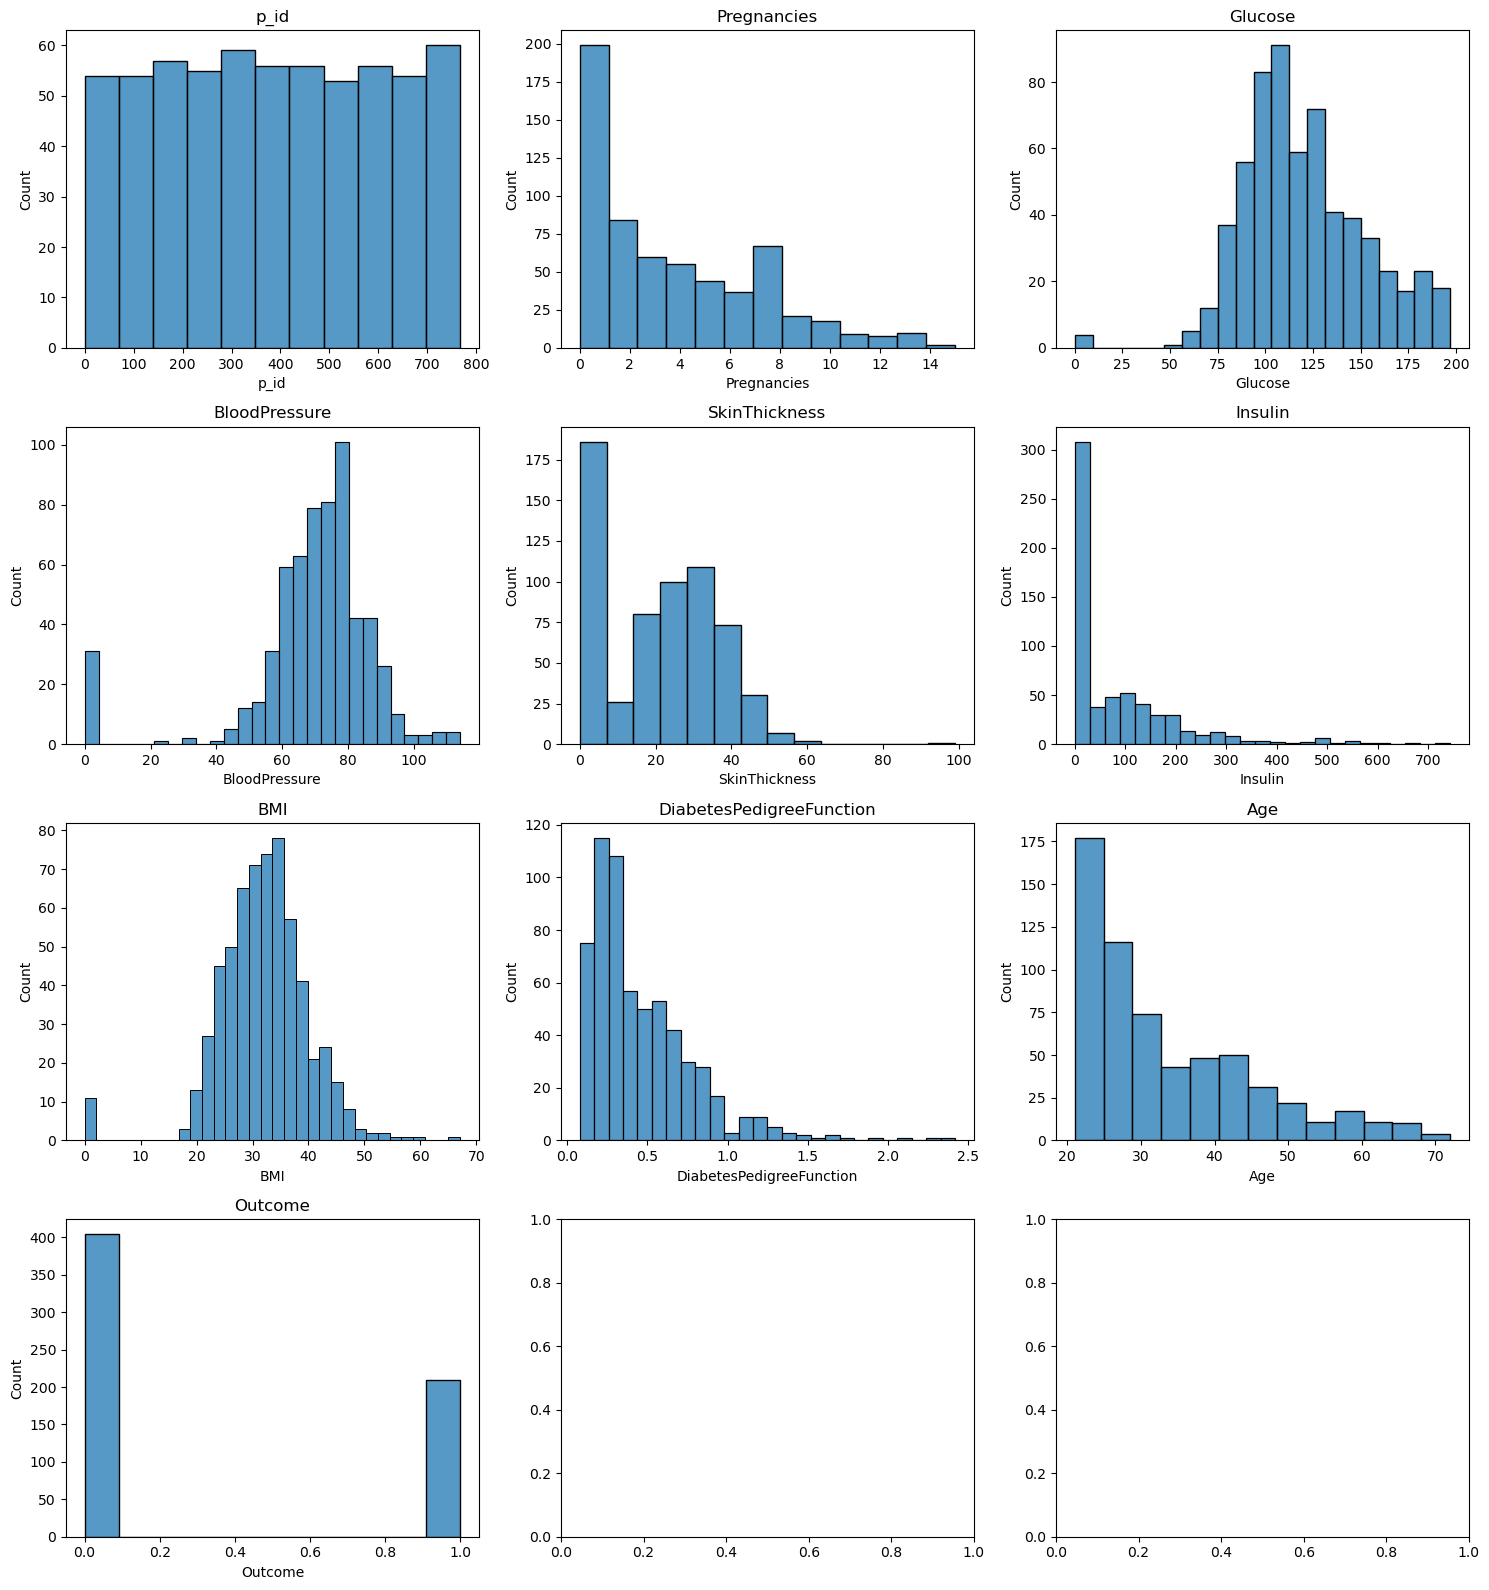

In [6]:
fig, axes = plt.subplots(len(train.columns) // 3 + (len(train.columns) % 3 > 0), 3, figsize=(15, 5 * len(train.columns) // 3))

for idx, col in enumerate(train.columns):
    sns.histplot(train[col], ax=axes.ravel()[idx])
    axes.ravel()[idx].set_title(col)

plt.tight_layout()
plt.show()


### Opvallende observaties
- Ten eerste viel ons op dat bij bloeddruk er metingen onder de 60 liggen, waaronder een aantal metingen van 0. Er zijn getallen onder de 60 waarvan wij denken dat dit mogelijke fouten zijn in de data, omdat een volwassene  niet kan overleven met bijvoorbeeld een bloeddruk van 40-50.
- Ten tweede viel ons op dat er bij "Insuline" waarden te zien zijn van 0 en het is zeer onwaarschijnlijk dat dat klopt. We zien daarnaast metingen van 500-700 en dit levert ook een zeer onwaarschijnlijke situaties op omdat zelfs voor mensen met diabetes type 2 dit enorm hoge metingen zijn.
- Tenslotte vinden wij de kolom "Glucose" erg interessant. Hoge waarden tussen de 180-200 zouden een grote kans aangeven dat deze mensen daadwerkelijk diabetes hebben. Lage waarden kunnen echter normaal zijn, die kunnen verklaard aan de hand van  de hoeveelheid voedsel die de mensen die dag hadden geconsumeerd. Dus de waarde 50 kan nog redelijk worden verklaard en deze waarde nemen we voor lief. Met de "0"-waarden, die in levende mensen technisch gezien onmogelijk zijn, zullen we uiteraard wel iets doen.

###### Nu gaan we kijken naar de uitschieters (outliers)

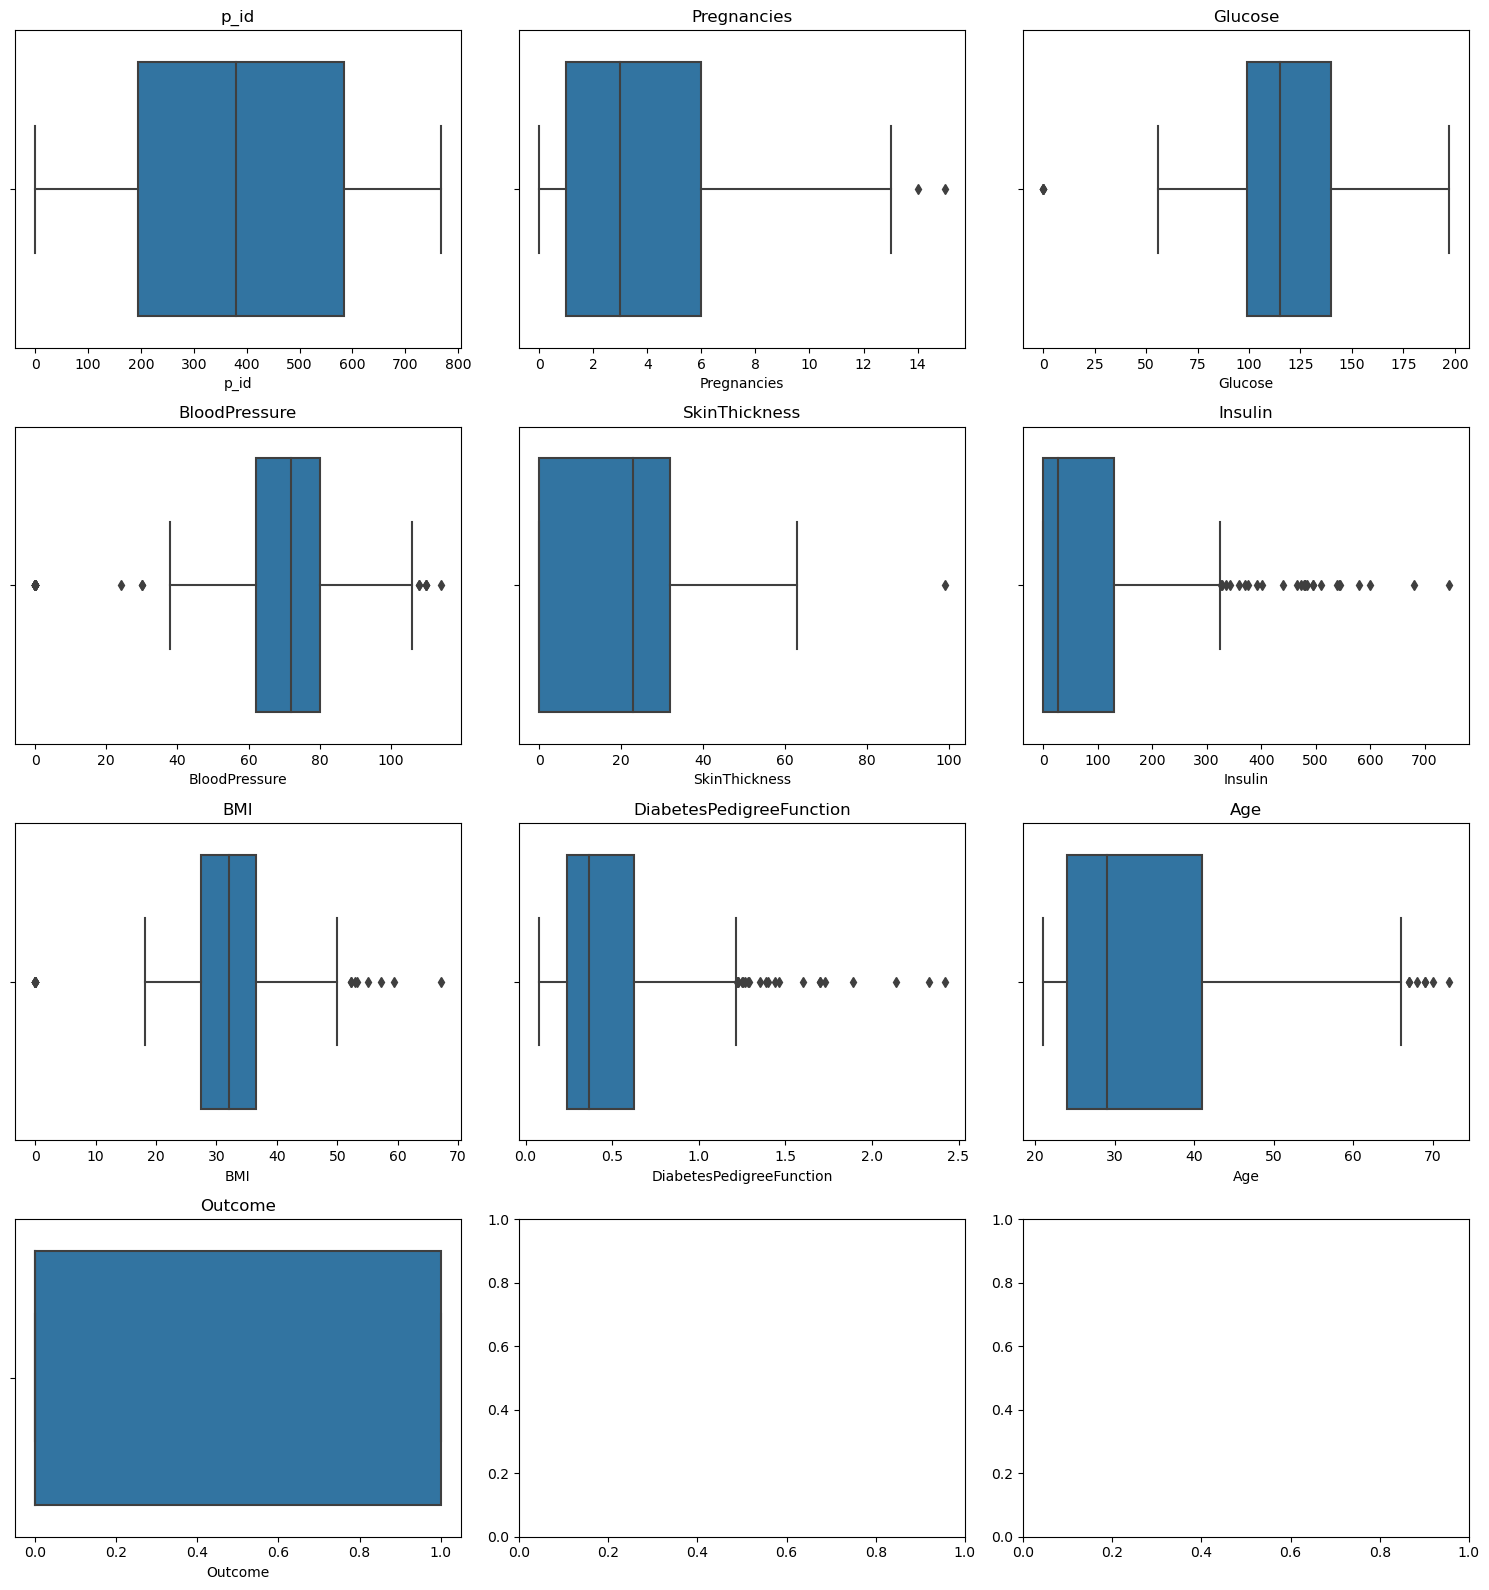

In [7]:
# Maak subplots
fig, axes = plt.subplots(len(train.columns) // 3 + (len(train.columns) % 3 > 0), 3, figsize=(15, 5 * len(train.columns) // 3))
axes = axes.ravel()

for idx, col in enumerate(train.columns):
    sns.boxplot(train[col], ax=axes.ravel()[idx])
    axes.ravel()[idx].set_title(col)

plt.tight_layout()
plt.show()


Op basis van het bovenstaande valt het ons op dat vooral de kolommen Insuline, BMI, DiabetesPedigreeFunction en Bloodpressure uitschieters bevatten. De uitschieters die niet nul zijn zijn interessant voor ons. Want dit soort uitschieters kunnen bij het helpen van diabetes. Zo worden hoge glucose- / insulinewaarden vaak gelinkt aan gevallen van diabetes.

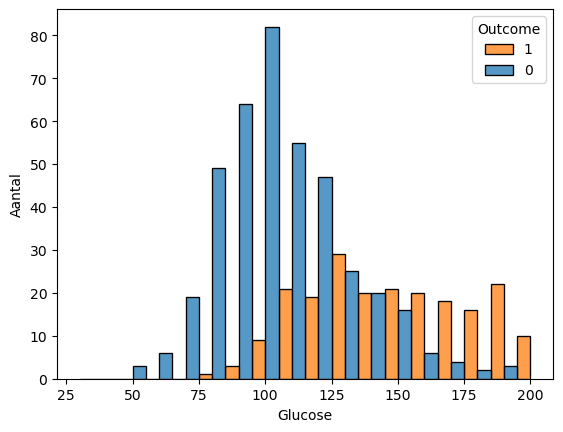

In [8]:
sns.histplot(data=train, x="Glucose", hue="Outcome", multiple="dodge",binwidth=10,binrange=(30,200))

# Voeg labels en een legenda toe
plt.xlabel("Glucose")
plt.ylabel("Aantal")
plt.legend(title="Outcome",labels = ["1","0"])

# Toon de plot
plt.show()


Hierboven zien we dat vanaf een glucoseniveau van rond de 120 de verhouding van "0" (geen diabetes) en "1" (wel diabetes) erg verandert. En vanaf een glucoseniveau van 140 begint het aantal gevallen van diabetes de overhand te nemen ten opzichte van de gevallen zonder diabetes. 

In [9]:
#basistatistieken van alle kolommen
train.describe()


p_id  Pregnancies     Glucose  BloodPressure  SkinThickness  \
count  614.000000   614.000000  614.000000     614.000000     614.000000   
mean   385.542345     3.809446  120.465798      68.903909      20.456026   
std    222.135103     3.375544   31.959619      19.933385      16.063105   
min      0.000000     0.000000    0.000000       0.000000       0.000000   
25%    194.250000     1.000000   99.000000      62.000000       0.000000   
50%    380.500000     3.000000  115.000000      72.000000      23.000000   
75%    583.750000     6.000000  140.000000      80.000000      32.000000   
max    767.000000    15.000000  197.000000     114.000000      99.000000   

          Insulin         BMI  DiabetesPedigreeFunction         Age  \
count  614.000000  614.000000                614.000000  614.000000   
mean    81.250814   31.929642                  0.468096   33.265472   
std    116.947384    8.136791                  0.329203   11.851427   
min      0.000000    0.000000                  0.078000   21.000000   
25%      0.000000   27.400000                  0.238000   24.000000   
50%     27.000000   32.150000                  0.365500   29.000000   
75%    130.000000   36.500000                  0.628500   41.000000   
max    744.000000   67.100000                  2.420000   72.000000   

          Outcome  
count  614.000000  
mean     0.342020  
std      0.474773  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000

##### Nu onderzoeken we de correlatie tussen de kolommen.

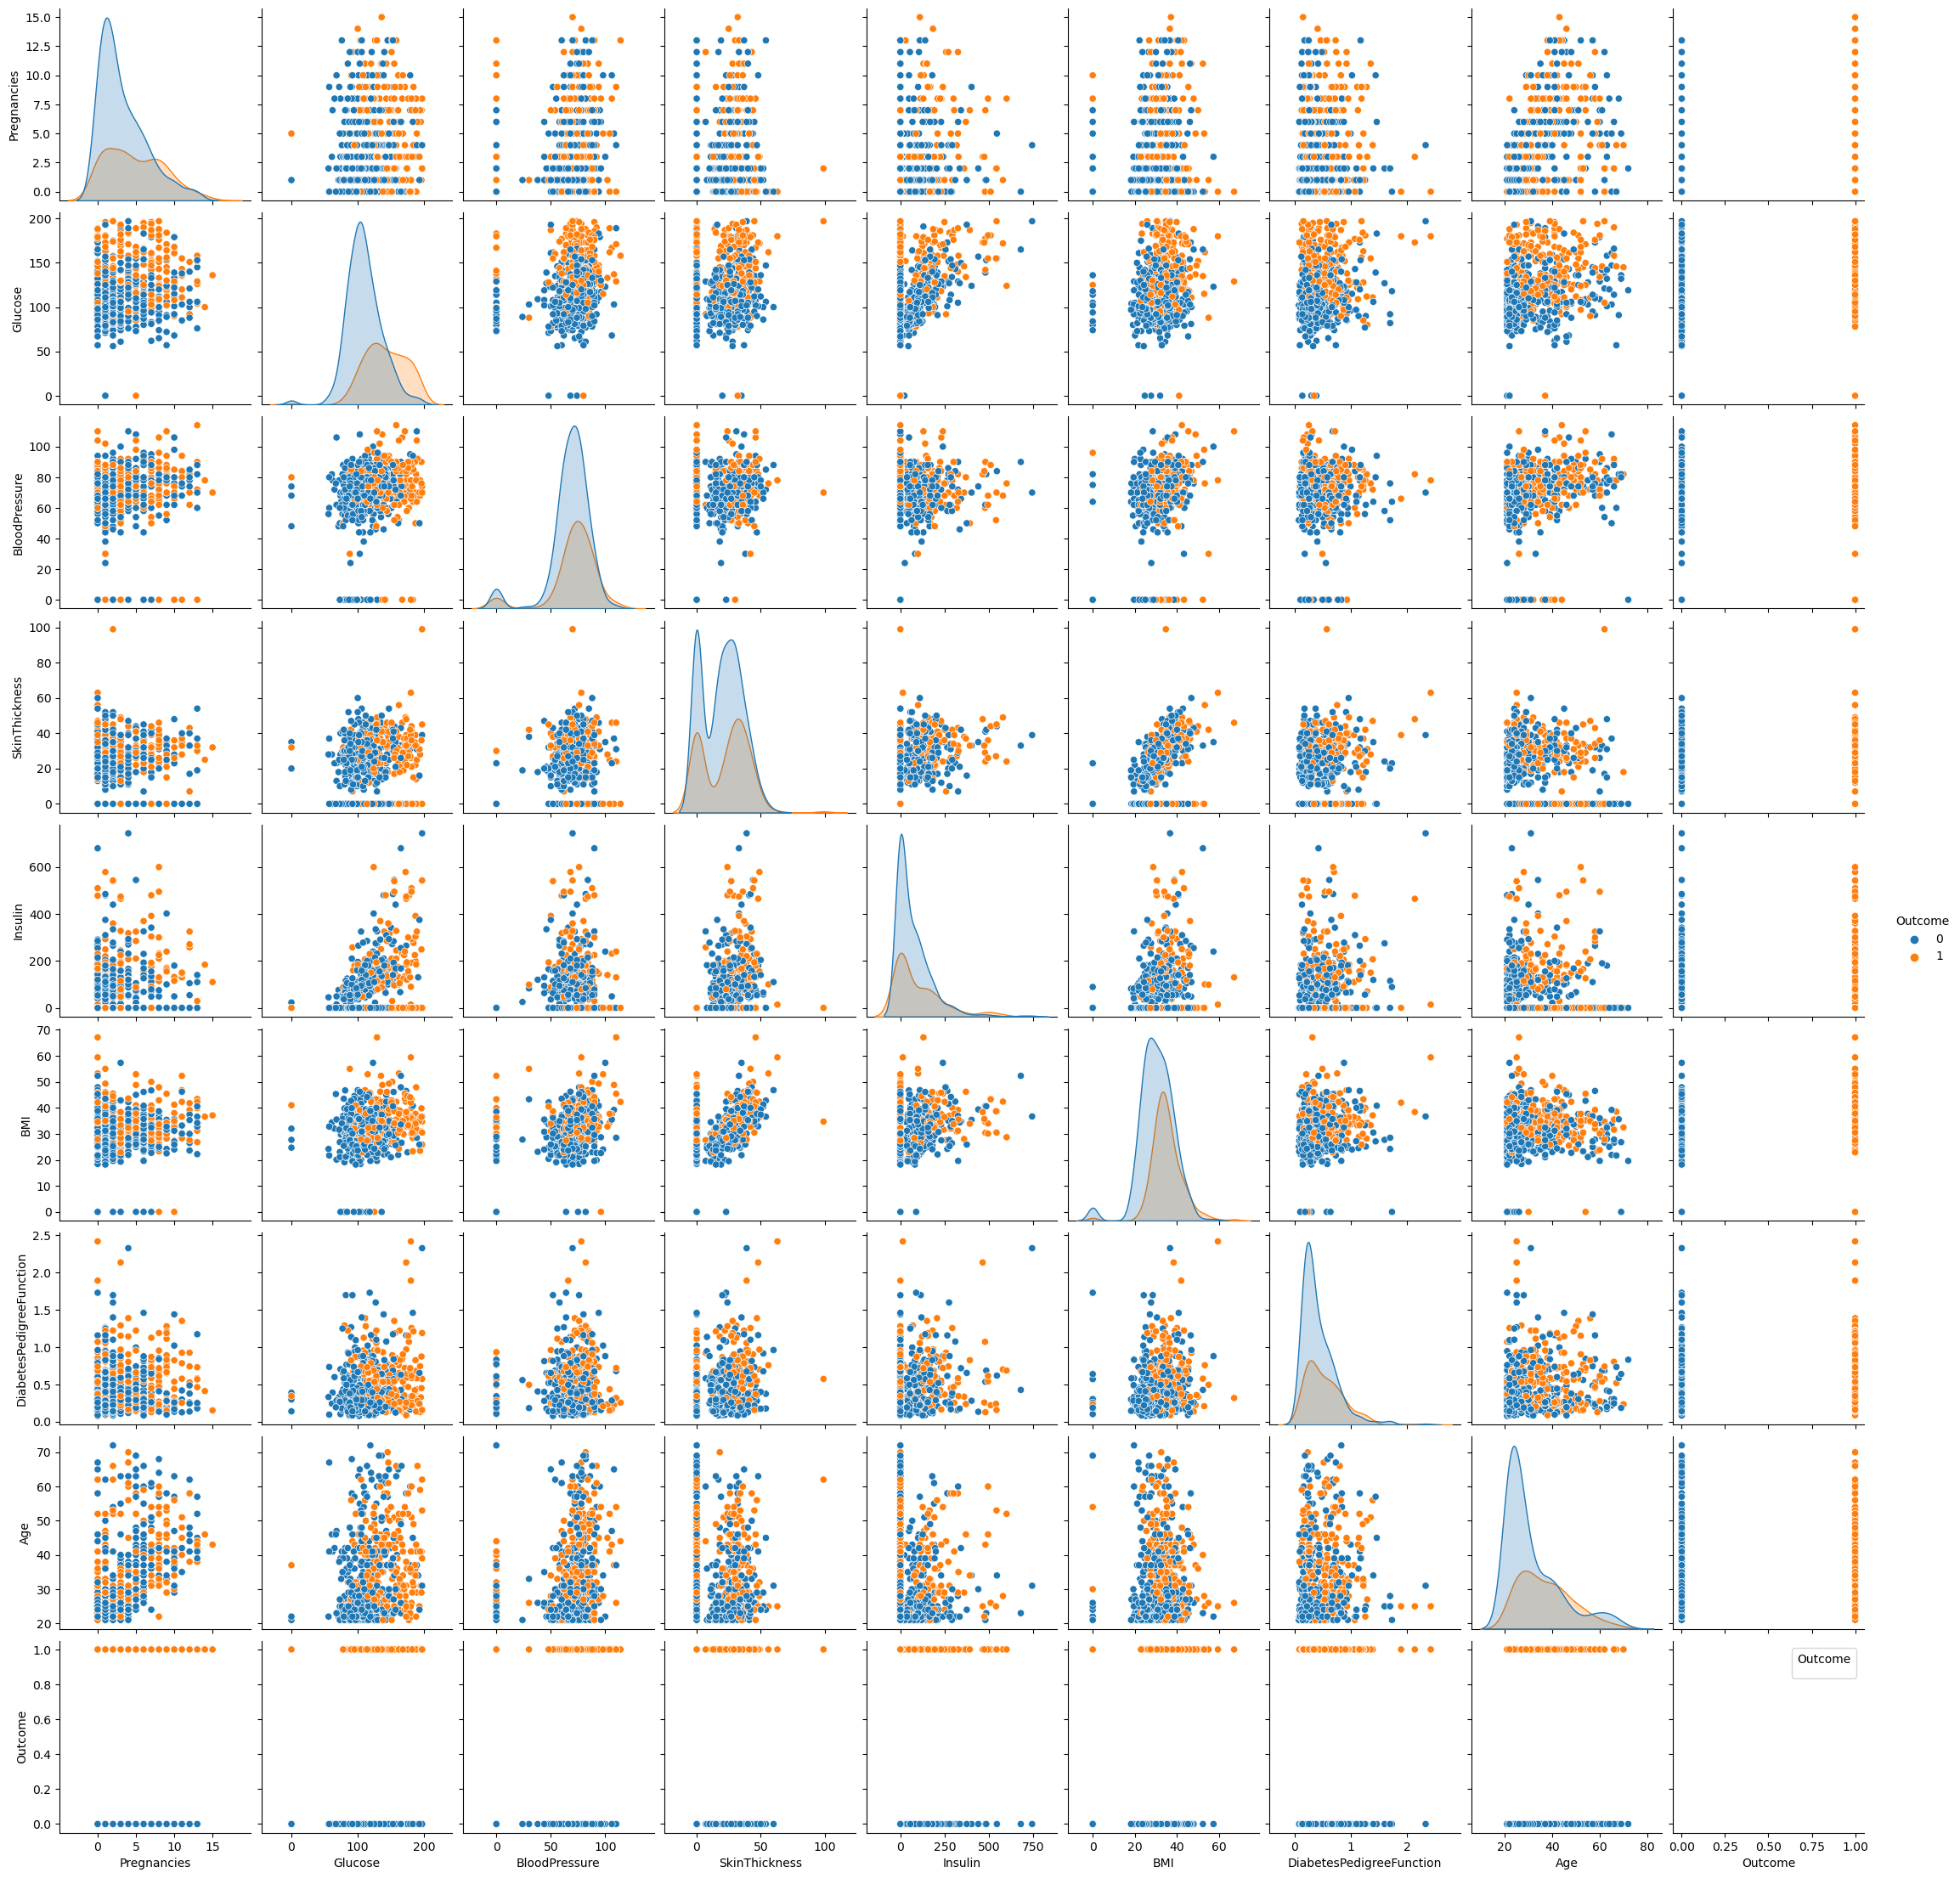

In [10]:
# Veronderstelling: je dataframe heet df
# Definieer de lijst met kolomnamen
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Gebruik de kolomnamen rechtstreeks in pairplot
sns.pairplot(data=train, vars=columns, hue="Outcome")
plt.legend(title="Outcome", labels=["0", "1"],fontsize=12)
plt.show()


Als we de bovenstaande pairplot voorzichtig op het oog interpreteren, zien we dat naarmate de glucosewaarde hoger wordt, het aantal datapunten met diabetes toeneemt. Bij plots waarbij age op één van de assen te vinden is, is de trend te zien dat bij een gevorderde leeftijd meer datapunten te zien zijn met diabetes, alhoewel er daar meer datapunten zijn die ondanks een gevorderde leeftijd geen diabetes hebben, dan dat er datapunten zijn die bij een hoge glucosewaarde geen diabetes hebben. Bij de correlatie van glucose en leeftijd is te zien dat bij een hogere leeftijd en hoge glucose in deze populatie alleen maar mensen met diabetes te vinden zijn. Bij de waarden BloodPressures en Skin thickness is te zien dat naar boven uitschietende waarden bijna allemaal correleren met diabetes.


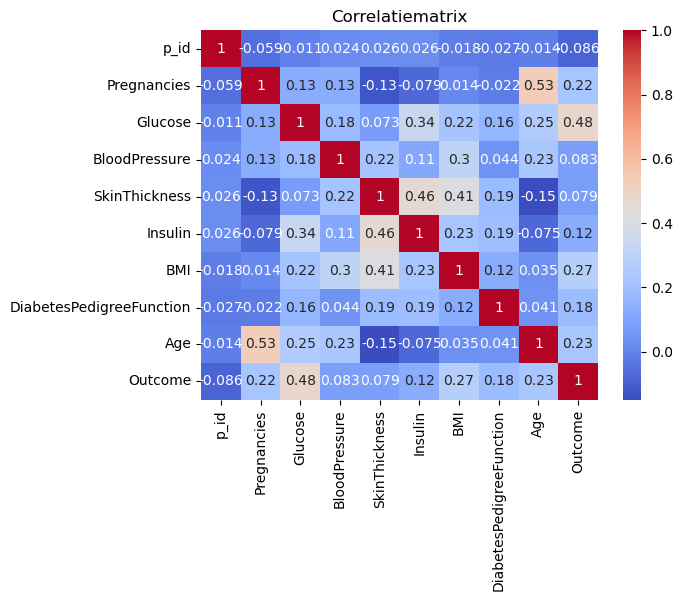

In [11]:
# Bereken de correlatiematrix
corr_matrix = train.corr()
# Plot de correlatiematrix als een heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlatiematrix')
plt.show()

In de bovenstaande matrix is de correlatie tussen de features te zien. 
Over het algemeen hebben de features nauwelijks correlaties, omdat de correlatiewaarden van rond de 0.01 tot 0.4 slechts zwak tot zeer zwak positief te noemen zijn. De features zijn dus over het algemeen behoorlijk onafhankelijk.
Er zijn echter ook een aantal gematigd positieve correlaties te zien, waarbij er dus sprake is van een gematigde lineaire afhankelijkheid.
Dit zijn de volgende correlaties:
Age & Pregnancy: 0.53
Glucose & Outcome: 0.48
BMI & SkinThickness: 0.41
Insuline & SkinThickness: 0.46

De correlaties liggen zo aanzienlijk laag en zelfs de gematigde positieve correlaties zijn te zwak om daar sterke voorspellingen mee te kunnen maken. Daarom hebben de correlaties weinig praktische toepasselijkheid voor ons.
Wat wel een belangrijke is om te onthouden is Outcome & Glucose, omdat het aangeeft dat er een gematigde positieve relatie bestaat tussen een hoger glucoseniveau en het hebben van diabetes.

###### Overzicht van de gemiddelde waarden van wel (1) of geen diabetes (0) per kolom

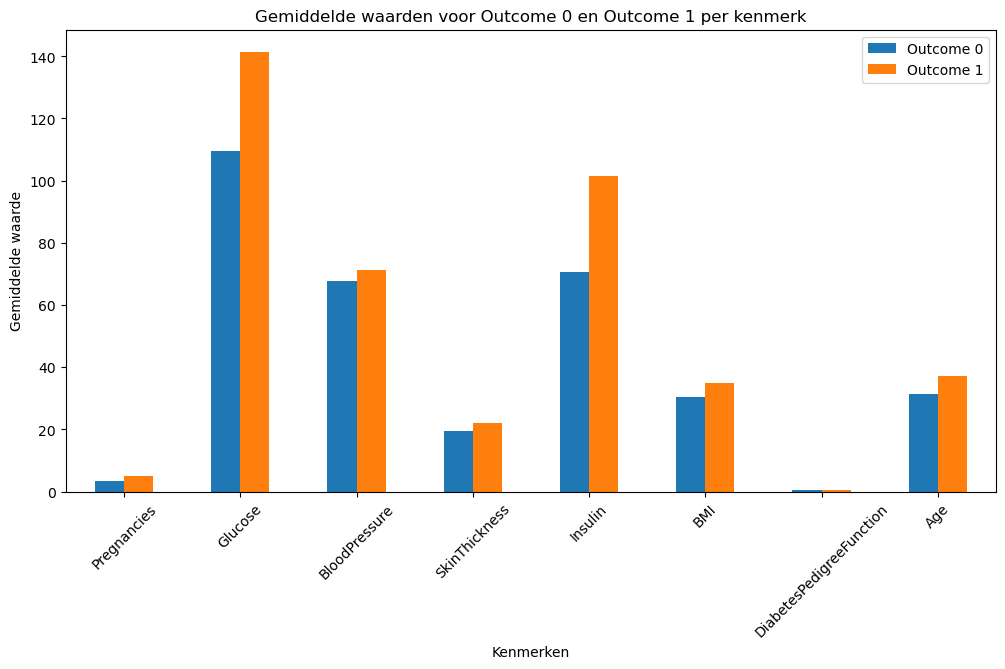

In [12]:
#Insuline hoort eigenlijk ook een invloed te hebben
#even kijken of dit gemiddeld genomen een verschil is
avg_out = train.groupby(['Outcome']).mean()
avg_out = avg_out.drop('p_id', axis=1)
avg_out = avg_out.T
outcome_labels = ['Outcome 0', 'Outcome 1']

# Plot de barplots voor elke waarde (kolom)
avg_out.plot(kind='bar', figsize=(12, 6))
plt.xticks(rotation=45)  
plt.xlabel('Kenmerken')
plt.ylabel('Gemiddelde waarde')
plt.title('Gemiddelde waarden voor Outcome 0 en Outcome 1 per kenmerk')
plt.legend(outcome_labels)
plt.show()

De bovenstaande plot bestendigt de bevinding dat er bij hogere glucosewaarden de uitkomst vaker 1 ("wel diabetes") is, die we al eerder hebben laten zien in de EDA. Op basis van de bovenstaande plot  kunnen we verder nog opmerken dat een dergelijk verband ook van toepassing is op de feature Insulin.

##### Nul / NaN-waarden

Vanwege het feit dat we nulwaarden tegenkwamen bij features waar dat eigenlijk onmogelijk is, gaan we bij het onderhavige project op een manier met Nul / Nan-waarden om die nieuw voro ons is. Ten behoeve van deze methode moeten we echter wel NaN-waarden hebben. Hiertoe veranderen we om te beginnen alleen de 0 metingen van de kolommen waarbij wij denken dat die interessant zijn voor het model. Later kunnen we nog overwegen om waarden van bloodpressure die laag zijn of absurd hoge glucose hierbij mee te nemen

In [13]:
#Hierbij hebben we missende waarden nodig dus de belangrijke "0"-waarden gaan we vervangen met 0
cols = ['Glucose', 'Insulin', 'SkinThickness', 'BloodPressure', 'BMI']

for col in cols:
    train[col] = train[col].replace(0, np.nan)

    

In [14]:
#Check: of de nan waarden er zijn
train.isna().sum()


p_id                          0
Pregnancies                   0
Glucose                       4
BloodPressure                31
SkinThickness               184
Insulin                     300
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

###### Gegevensaanvulling: KNN en Imputing

We maken voor het toepassen van de imputer kopieën van de dataframes. Dit doen we als voorzorgsmaatregel, zodat de originele data niet zal worden aangepast. De imputer vult ontbrekende gegevens aan.

In [15]:
train_copy = train.copy()
train_copy = train_copy.drop(['p_id'], axis=1)

In [16]:
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

errors = []
n_neighbors_options = range(1, 21)  # bijvoorbeeld: van 1 tot 20 buren

X_train, X_test = train_test_split(train_copy, test_size=0.2, random_state=42)

for n_neighbors in n_neighbors_options:
    imputer = KNNImputer(n_neighbors=n_neighbors)
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)
    
    # Rijen verwijderen die NaN-waarden bevatten in het oorspronkelijke X_test
    X_test_filtered = X_test.dropna()
    X_test_imputed_filtered = pd.DataFrame(X_test_imputed, index=X_test.index).loc[X_test_filtered.index]
    
    # Bereken de MSE voor de gefilterde datasets
    mse = mean_squared_error(X_test_imputed_filtered, X_test_filtered)
    errors.append(mse)

best_n_neighbors = n_neighbors_options[errors.index(min(errors))]
print(f"beste aantal neighbors: {best_n_neighbors}")


beste aantal neighbors: 1


##### 1. Voorbereiden van de Data
We splitsen de volledige dataset in twee delen: een trainingsset en een testset. De trainingsset helpt ons bij het "leren" van de imputatie, terwijl de testset wordt gebruikt om de kwaliteit van de imputatie te evalueren.

##### 2. Iteratie over Buren
Om de beste waarde voor het aantal buren in KNN (K-Nearest Neighbors) te vinden, proberen we verschillende waarden uit. Voor elk aantal buren wordt de KNN-imputatie afzonderlijk uitgevoerd.

##### 3. Imputatie
Tijdens elke iteratie (voor elk aantal buren) voeren we de imputatie uit. Dit betekent dat we de KNN-methode gebruiken om de ontbrekende waarden in de trainingsset te schatten.

##### 4. Validatie en Foutmeting
Na de imputatie evalueren we de kwaliteit ervan door de imputatieresultaten op de testset te vergelijken met de werkelijke waarden. We gebruiken de gemiddelde kwadratische fout (Mean Squared Error, MSE) om dit verschil te kwantificeren.Hierbij moesten we wel de NaN-waarden verbergen sinds het geen error kan berekenen als 1 of beide waarden waarmee je vergelijkt missen


##### 5. Kies Optimaal Aantal Buren
Na het evalueren van de imputatie voor alle mogelijke waarden van het aantal buren, kiezen we de waarde die de laagste MSE oplevert. Deze waarde wordt beschouwd als het optimale aantal buren voor de KNN-imputatie voor onze dataset.






In [17]:
from sklearn.preprocessing import StandardScaler

# Hier normalizeren we de data, dit kan voor meer nauwkeurige data zorgen bij KNN
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(train_copy), columns=train_copy.columns)

# Voer vervolgens KNN-imputatie uit
imputer = KNNImputer(n_neighbors=1)
df_imputed_scaled = pd.DataFrame(imputer.fit_transform(df_scaled), columns=train_copy.columns)

# Zet de geïmputeerde, geschaalde gegevens terug naar de oorspronkelijke schaal
imputed_train = pd.DataFrame(scaler.inverse_transform(df_imputed_scaled), columns=train_copy.columns)

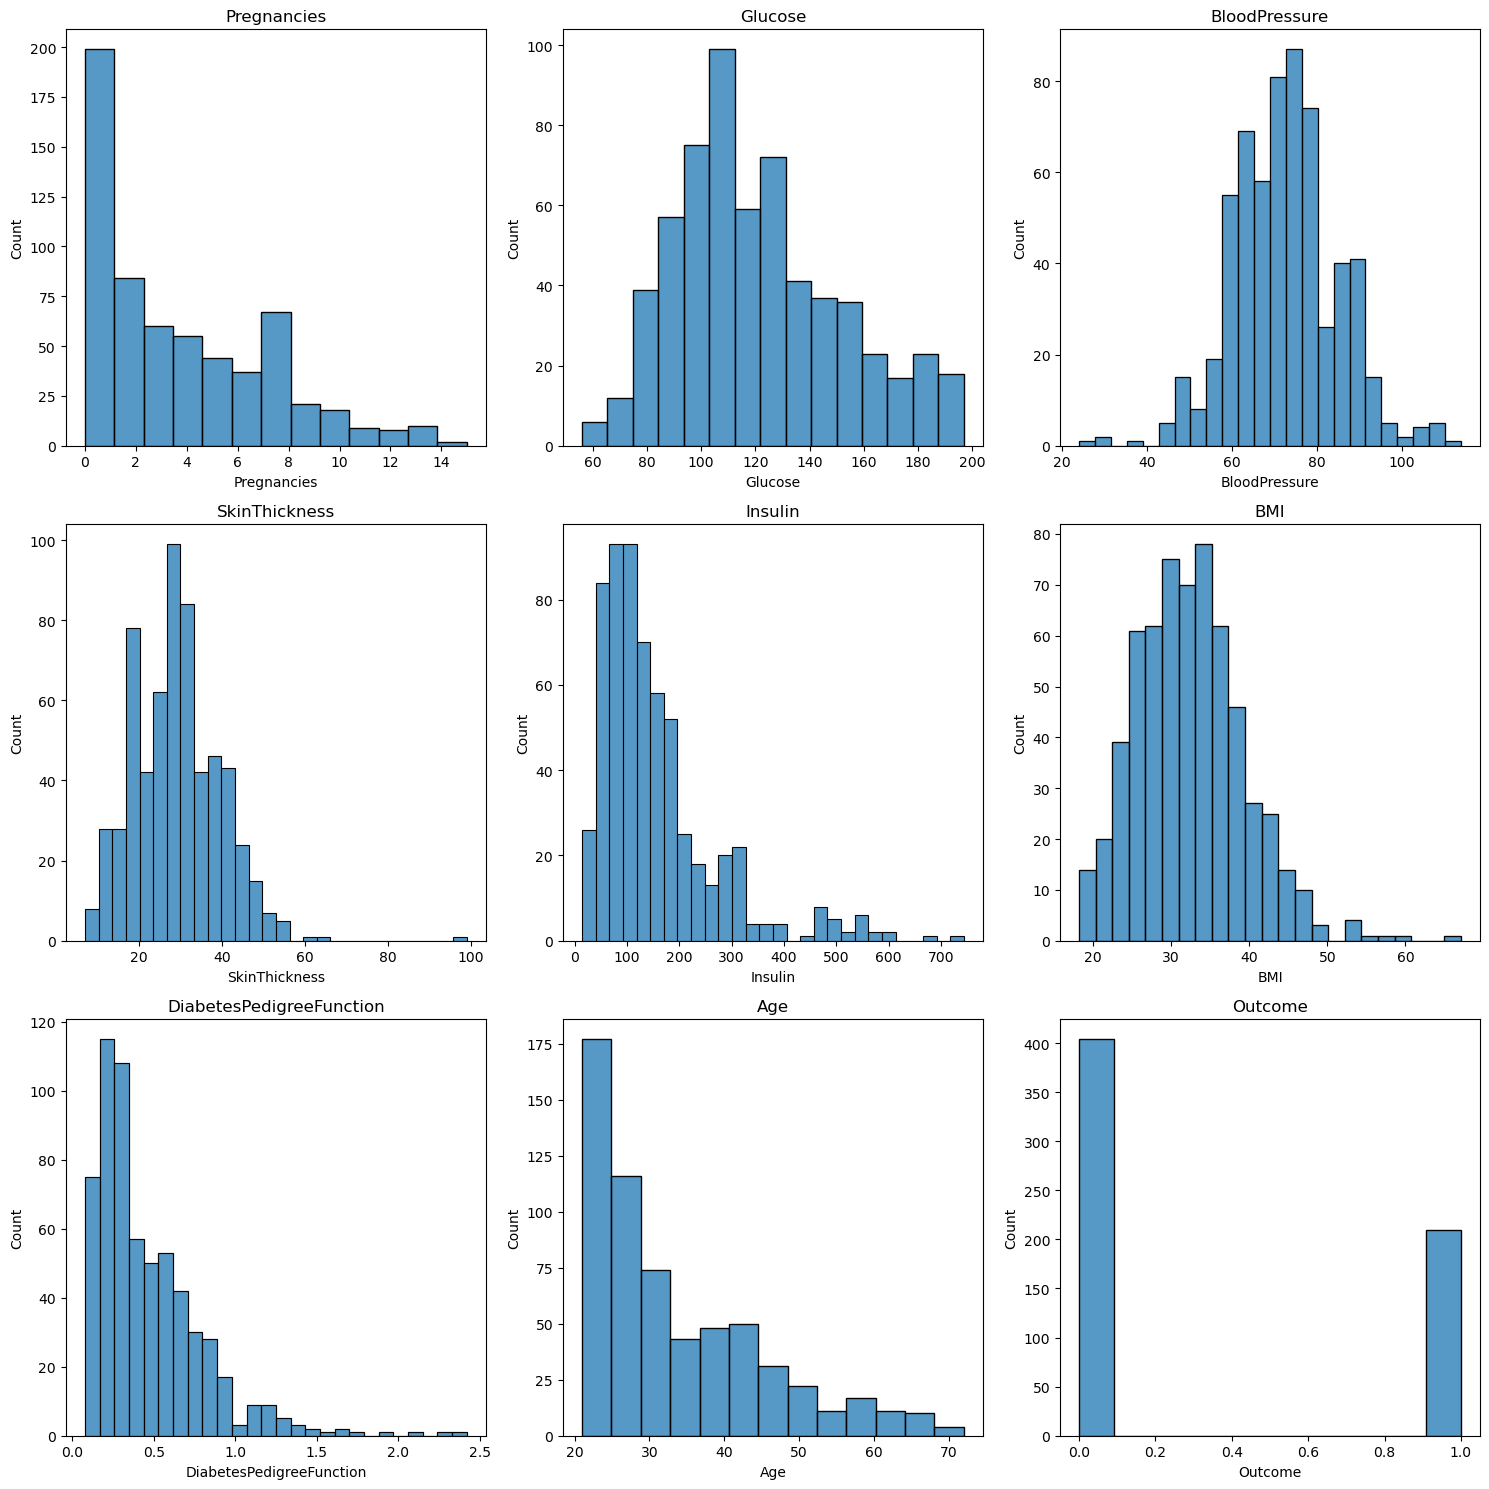

In [18]:
fig, axes = plt.subplots(len(imputed_train.columns) // 3 + (len(imputed_train.columns) % 3 > 0), 3, figsize=(15, 5 * len(imputed_train.columns) // 3))

for idx, col in enumerate(imputed_train.columns):
    sns.histplot(imputed_train[col], ax=axes.ravel()[idx])
    axes.ravel()[idx].set_title(col)

plt.tight_layout()
plt.show()

In [19]:
print(imputed_train.isna().sum())




Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Hier kunnen we zien dat de waarden die eerst een 0 meting hadden nu goed zijn verdeeld, Nu is het alleen nog de vraag wat we willen doen met de verre uitschieters, voornamelijk bij Insulin en SkinThickness. Omdat er zeer weinig onlogische uitschieters zijn denken wij niet dat het veranderen van de meetingen veel invloed zal hebben op het model 

Het blijft wel een optie om te kijken of de modellen beter preseteren als we de rijen van Insulin > 600 en SkinThickness > 100 eruit halen.

##### Beschrijf wat wordt bedoeld met het standaardiseren van de data. Geef aan in welke gevallen dit gewenst is. Beargumenteer of het waarde toevoegt voor deze dataset en voer eventueel standaardisatie uit. 

Standaardiseren van data verwijst naar het proces waarbij de waarden van verschillende variabelen of kenmerken in een dataset worden omgezet zodat ze een vergelijkbare schaal hebben. Dit wordt meestal gedaan door de gegevens te transformeren zodat ze een gemiddelde van nul hebben en een standaarddeviatie (variantie) van één. In essentie wordt elke waarde in de dataset gecentreerd rond het gemiddelde en schalen we de waarden dusdanig zodat ze een vergelijkbare spreiding hebben. 

Op basis van de weergegeven statistieken lijken de numerieke variabelen in deze dataset redelijk vergelijkbare schalen en orde van grootte te hebben. Het gemiddelde en de standaarddeviatie variëren niet sterk tussen de variabelen.

Voor de onderhavige dataset lijkt standaardisatie niet strikt noodzakelijk, vooral als je van plan bent algoritmen te gebruiken die niet bijzonder gevoelig zijn voor de schaal van de variabelen, zoals beslissingsbomen of random forests. Echter, als je van plan bent om algoritmen te gebruiken die afhankelijk zijn van de afstand tussen datapunten, zoals K-Nearest Neighbors (KNN) of Support Vector Machines (SVM), kan het nog steeds gunstig zijn om te standaardiseren om ervoor te zorgen dat alle variabelen op een vergelijkbare schaal liggen.

<b>Bevindingen EDA</b>

Tijdens onze exploratory data analysis hebben we bevindingen gedaan op het vlak van de diabetes-data zelf en correlaties tussen de features van die dataset, en we hebben de dataset gestandaardiseerd om op die manier vergelijkbare schalen te creëren. 

We zijn erachter gekomen dat veel nulwaarden vermoedelijk geen echte nullen zijn, maar ontbrekende gegevens vertegenwoordigen. Daarom mogen we ze niet beschouwen als echte nullen. Andere nullen die we tegenkwamen, zoals in de kolommen "Pregnancies" en "p_id," zijn wel logische nulwaarden. Maar niet alle data is even relevant. Zo staat de kolom "p_id" compleet los van ons model. 

Onze bevindingen over de correlaties zijn dat ze zwak tot zeer zwak zijn, met uitzondering van een aantal correlaties die matig positief te noemen zijn. Door deze matige correlaties hebben wij een verband waargenomen tussen het glucoseniveau en de toestand dat iemand diabetes heeft. Ook zijn er matig sterke verbanden waargenomen tussen insuline en het hebben van diabetes, een hogere leeftijd hebben, zwanger zijn en diabetes hebben. 

Een hoog glucoseniveau lijkt, met een positieve correlatiecoëfficiëntscore van 0.53, in deze verzameling van zwakkere correlaties nog de sterkste aan te tonen met diabetes. Glucose is daarom een feature waar wij veel rekening mee zullen houden in de rest van dit Notebook. Ook vinden wij Insuline, BMI en SkinThickness iets om in het achterhoofd te houden door de volgende correlaties: BMI & SkinThickness: 0.41
Insuline & SkinThickness: 0.46

<h2 style="color:#7CAFC4">Opdracht 2: Evaluatie </h2>

<b>Deze opdracht heeft betrekking op een bepaalde vorm van machine learning. Welke vorm is dit? Licht het antwoord toe.</b>

Voor het voorspellen van suikerziekte gebruiken we feature-kolommen om de "Outcome" kolom te voorspellen. De kolom Outcome kan 2 mogelijke waarden aannemen: 0 geeft aan dat er geen suikerziekte is, terwijl 1 aangeeft dat er wel sprake is van suikerziekte. Omdat elk datapunt in één van de twee concrete categorieën ondergebracht wordt, hebben we te maken met een classificatieprobleem. Daarbij past "classificatie" als vorm van machine learning. 

<b>Geef aan met welke “metrics”, voor deze vorm van machine learning, bepaald kan worden hoe goed een model presteert. Toon de uitkomsten op deze metrics aan de hand van een zelf te kiezen machine learning algoritme. <b/>

Deze metrics die kunnen bepalen hoe goed deze vorm van machine learning presteren zijn accuracy, precision, recall en de F1-score.

1. Accuracy (Nauwkeurigheid) = Het percentage van de correct voorspelde observaties ten opzichte van het totaal aantal observatie.

2. Precision (Precisie) = De hoeveelheid daadwerkelijk positieve voorspellingen van alle positieve voorspellingen. 

3. Recall(Gevoeligheid) = De hoeveelheid positieve voorspellingen ten opzichte van alle daadwerkelijke positieve gevallen. 

4. F1-score = Een score om de prestatie van een model te meten door zich te baseren op een evenwicht van Precision en Recall.  

Bron: ChatGpt (De chat hiervan is niet terug te vinden)

Om dit te weergeven in Jupyter notebook hebben we gekozen voor Logistic Regression. 

https://chat.openai.com/share/639ed649-df20-4c9d-bc17-8307f9ec6871

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Split de data in X en y Train en Test data
X = imputed_train.drop(['Outcome'], axis=1)
y = imputed_train['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regressie model maken en fitten
model = LogisticRegression(max_iter =  1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Accuracy score berekenen
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy * 100:.2f}%")

Precision = precision_score(y_test, y_pred)
print(f"Precision Score: {Precision * 100:.2f}%")

recall = recall_score(y_test, y_pred)
print(f"Recall Score: {recall * 100:.2f}%")

f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1 * 100:.2f}%")


Accuracy Score: 77.84%
Precision Score: 74.14%
Recall Score: 62.32%
F1-score: 67.72%


<b>Leg uit hoe iedere metric wordt berekend. Gebruik hierbij een confusion matrix.</b>

Accuracy Score: 77.84%
Precision Score: 74.14%
Recall Score: 62.32%
F1-score: 67.72%


array([[101,  15],
       [ 26,  43]], dtype=int64)

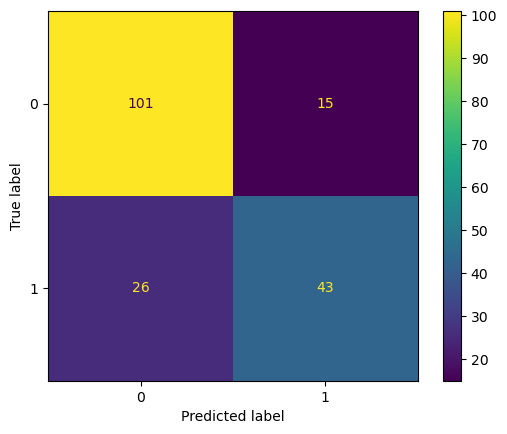

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
accuracy = (TN + TP) / (TN + FP + TP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2* precision * recall / (precision + recall)
print(f"Accuracy Score: {accuracy * 100:.2f}%")
print(f"Precision Score: {Precision * 100:.2f}%")
print(f"Recall Score: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")

disp = ConfusionMatrixDisplay(cm)
disp.plot()
display(cm)


## Confusion Matrix:

Een Confusion Matrix is een tabel die wordt gebruikt om de prestaties van een classificatiemodel te beoordelen wanneer dit wordt toegepast op een set gegevens waarvan de werkelijke waarden bekend zijn.


Hier is de algemene structuur van een confusion matrix voor een binair classificatieprobleem:

|                    | **Voorspelde waarde: Nee** | **Voorspelde waarde: Ja** |
|--------------------|:------------------:|:-----------------:|
| **Echte waarde: Nee**      |       TN           |        FP         |
| **Echt waarde: Ja**       |       FN           |        TP         |





Waarbij:
- **TN (True Negative)** = Het aantal correct voorspelde negatieve gevallen.
- **FP (False Positive)** = Het aantal negatieve gevallen die incorrect als positief zijn voorspeld.
- **FN (False Negative)** = Het aantal positieve gevallen die incorrect als negatief zijn voorspeld.
- **TP (True Positive)** = Het aantal correct voorspelde positieve gevallen.

&nbsp;

Kunnen we de volgende metrieken berekenen:

&nbsp;

1. **Accuracy (Nauwkeurigheid)**: Het totale percentage van correct voorspelde observaties ten opzichte van alle observaties.
    $$
    \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
    $$

&nbsp;

2. **Precision (Precisie)**: Van alle voorspelde positieve waarden, hoeveel waren er daadwerkelijk positief?
    $$
    \text{Precision} = \frac{TP}{TP + FP}
    $$

&nbsp;

3. **Recall (Sensitiviteit of True Positive Rate)**: Van alle daadwerkelijke positieve waarden, hoeveel hebben we er correct voorspeld?
    $$
    \text{Recall} = \frac{TP}{TP + FN}
    $$

&nbsp;

4. **F1-Score**: Het harmonische gemiddelde van precision en recall dat een balans geeft tussen die twee. Wanneer zowel precisie als recall belangrijk zijn, kan F1-Score een nuttige metriek zijn.
    $$
    \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
    $$
(Suresh, 2021)


&nbsp;





<b>Kies een metric die in jullie ogen het meest relevant is en beargumenteer je keuze.</b>

Voor ons zijn hier de FP en de FN het belangrijkst om naar te kijken, dit komt doordat:

FP: False positives voorspellen dat de patient diabetes heeft terwijl de patient helemaal geen diabetes heeft. Dit leidt tot onnodige bezorgdheid en mogelijk meer tests terwijl dit niet nodig zou zijn, hoewel dit wel gezien als een "Veilige fout" sinds het ervoor zorgt dat de patient extra zorg en onderzoek hierbij kijken we dus sterk naar de metric "Precision" 

FN: False Negatives, Het model voorspelt dat de patient GEEN diabetes heeft terwijl dit wel het geval is. Dit is dan weer veel gevaarlijker sinds de patient met diabetes potentieel geen meerdere zorg of onderzoek meer krijgt dit kan dan leiden tot verslechtering van de gezondheid van de patient of andere problemen hierbij kijken we dus sterk naar de metric "Recall"

Kijkend hiernaar is dus de metric "F1-score" het meest belangrijk om het aantal False Negatives (recall) en False Positives (Precision) zo laag mogelijk te houden en bij F1-score kijken we naar zowel de "Recall" als de "Precision" metric. Ons doel dus zo min mogelijke foute voorspellingen omdat een verkeerde diagnose mogelijk schadelijke gevolgen kan hebben


<h2 style="color:#7CAFC4">Opdracht 3: Modelleren </h2>

## Logistic Regression


### Uitleg model
Logistic regression maakt in het geval van binaire classificatie gebruik van een lineaire combinatie om gegevens als één van twee categorieën te classificeren: True of False. De beslissingsgrens die bepaalt in welke categorie een datapunt valt wordt bepaald met behulp van de volgende formule:

$l = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n$

- $𝑙$ = logg-odds, geeft de kans aan dat een gegeven datapunt tot een specifieke categorie behoort.
- $𝛽0$ = bias, oftewel de intercept.
- $𝛽1, 𝛽2, .... 𝛽n$ = coëfficienten die de gewichten aangeven van de onafhankelijke variabelen.
- $𝑥1, 𝑥2, ..., 𝑥n$ = onafhankelijke variabelen; elke onafhankelijke variabele representeert een feature.

Een uitdaging hierbij is dat $l$ waarden kan aannemen tussen negatief oneindig en positief oneindig, terwijl de uitvoer moet worden beperkt tot het bereik van 0 tot 1. Dit komt doordat True wordt vertegenwoordigd door 1 en False door 0.

### Sigmoid function
Om ervoor te zorgen dat de uitvoerwaarden tussen 0 en 1 liggen, maken we gebruik van de sigmoid-functie:

$\hat{y} = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n)}}$

- $𝑦̂ $= de voorspelde kans
- $e$ = de natuurlijke logaritme
- $(𝛽0 + 𝛽1𝑋1 + 𝛽2𝑋2 + … + 𝛽𝑛𝑋𝑛)$ = de formule voor log-odds


Als de voorspelde kans $\hat{y}$ groter is dan 0.5, voorspelt het model True, anders wordt het als False beschouwd.
### Loss function
De binary cross-entropy (BCE) loss formule wordt gebruikt om de prestaties van een logistisch regressiemodel te meten. Hier is de formule:

$
BCE = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y_i}) + (1-y_i) \log(1-\hat{y_i}) \right]
$

- $N$ vertegenwoordigt het totale aantal datapunten in de trainingsdataset.
- $y_i$ is de ware klasse (0 of 1) van een datapunt.
- $\hat{y_i}$ is de voorspelde kans dat het datapunt behoort tot klasse 1. 

De formule werkt als volgt: als ons model denkt dat een datapunt tot klasse 1 behoort, aangegeven door $y_i$ gelijk aan 1, dan willen we dat onze voorspelde kans ($\hat{y_i}$) zo dicht mogelijk bij 1 ligt. Daarom wordt het eerste deel van de loss berekend als $y_i$ vermenigvuldigd met de logaritme van $\hat{y_i}$.

Aan de andere kant, als ons model denkt dat het datapunt tot klasse 0 behoort door $y_i$ gelijk te stellen aan 0, dan willen we ook dat onze voorspelde kans ($\hat{y_i}$) zo dicht mogelijk bij 0 ligt. Daarom wordt het tweede deel van de loss berekend als $(1-y_i)$ vermenigvuldigd met de logaritme van $(1-\hat{y_i})$.

Vervolgens nemen we al deze loss-waarden voor alle datapunten in onze dataset, tellen ze op en delen ze door het totale aantal datapunten ($N$) om de gemiddelde loss te krijgen. Dit geeft ons een idee van hoe goed ons model over het algemeen presteert.

Ten slotte nemen we de negatieve waarde van deze gemiddelde loss, omdat het ons doel is om deze loss-waarden te minimaliseren. Door dat we de negatieve waarden gebruiken, wordt onze "loss" kleiner naarmate ons model beter wordt in het maken van voorspellingen.
### Gradient Descent

Om het beste resultaat met een model te behalen, is het noodzakelijk om alle mogelijke opties te overwegen. Helaas is dit in de praktijk vaak onhaalbaar vanwege beperkte computerkracht. Gelukkig biedt Gradient Descent een oplossing, waarmee je toch de beste of een van de beste resultaten kunt bereiken zonder alle opties te hoeven doorlopen.

Gradient Descent is een techniek die wordt gebruikt om de maximale of minimale waarde van een functie te vinden. Dit gebeurt door het model te laten zoeken naar de juiste waarden voor de parameters, zodat de afgeleide van de functie zo dicht mogelijk bij nul komt.

De formule ziet er als volgt uit.

$x_{\text{new}} = x_{\text{old}} - \alpha \frac{dy}{dx}$

- $x_{\text{new}}$: De nieuwe waarde van de parameter die we proberen te optimaliseren.
- $x_{\text{old}}$: De vorige waarde van de parameter.
- $\alpha$: De learning rate, die bepaalt hoe groot de stappen zijn.
- $\frac{dy}{dx}$: De afgeleide van de functie die we optimaliseren met betrekking tot de parameter $x$. Dit geeft de richting aan waarin we de parameterwaarde moeten aanpassen om de functie te optimaliseren.

Gradient decent werkt als volgt:  

1. Het begint door een willekeurige waarde voor $x$ te kiezen.
2. Bepaal de afgeleide. Is deze negatief, positief of nul?
3. Pas $x$ aan met een stap in de tegenovergestelde richting van de afgeleide.
4. Bepaal opnieuw of de afgeleide negatief, positief of nul is.

Herhaal deze stappen totdat een verdere vermindering van de afgeleide richting nul niet meer mogelijk is (Coding Lane). 

### Regularisatie
L2-regularisatie wordt ook wel "Ridge Regression" genoemd. L2-regularisatie heeft een vermindering van overfitting als doel.  Overfitting is het verschijnsel dat een model de trainingsdata zo goed kent dat hij de data letterlijk onthoudt, in plaats van dat het model patronen uit de data haalt. Wanneer het model vervolgens voorspellingen probeert te doen op basis van nieuwe data, presteert het slecht, omdat het te weinig afgaat op algemene patronen. L2-regularisatie voorkomt overfitting door de parameters in het model te verkleinen, waardoor het model minder gevoelig voor de kenmerken van de trainingsdataset en beter in staat is om algemene patronen te ontwaren die ook op onbekende datasets kunnen worden toegepast.

Dit wordt bereikt door de kwadraten van de parameters ($b_i ^2$) op te tellen en te vermenigvuldigen met een hyperparameter $\alpha_2$. Hoe groter de waarde van $\alpha_2$, des te sterker de regularisatie en dit leidt tot kleinere parameterwaarden.

De formule voor L2-regularisatie is als volgt:

$L_2 = \alpha_2 \sum_{i=1}^{N} b_i ^2$

(StatQuest, 2018, September 24).


L1-regularisatie wordt ook wel "Lasso Regression"genoemd. L1-regularisatie en L2-regularisatie hebben vergelijkbare eigenschappen. Het belangrijkste verschil tussen de twee vormen van regularisatie is de manier waarop de parameters worden geregulariseerd. In plaats van de kwadraten van de parameters te gebruiken, maakt L1-regularisatie gebruik van de absolute waarden van de parameters ($|b_i|$). Hierdoor heeft Lasso Regression het effect dat het sommige parameters volledig kan uitsluiten (ze worden gelijk aan nul) tijdens het trainen van het model. Dit is anders dan Ridge Regression, waarbij de parameters alleen worden verkleind maar niet naar nul worden gebracht.

Voor L1-regularisatie ziet de formule er als volgt uit:

$L_1 = \alpha_1 \sum_{i=1}^{N} |b_i|$

De keuze tussen L2- en L1-regularisatie hangt af can de eigenschappen van de dataset. L2-regularisatie wordt vaak gebruikt wanneer alle functies min of meer even belangrijk zijn, terwijl L1-regularisatie nuttig kan zijn wanneer het vermoeden bestaat dat slechts een deel van de functies van wezenlijke invloed is op het model (StatQuest, 2018, October 1).

In [22]:
lg = LogisticRegression(max_iter =  10000, random_state = 42)


In [23]:
param = [{
    'penalty': ['l2'],
    'C': [0.01, 0.1, 0.3, 0,5, 0,7, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,10, 100],
    'solver': ['lbfgs']},
{
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 0.3, 0,5, 0,7, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,10, 100],
    'solver': ['liblinear']},
{
    'penalty': ['l2'],
    'C': [0.01, 0.1, 0.3, 0,5, 0,7, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,10, 100],
    'solver': ['newton-cg']},
{
    'penalty': ['l2'],
    'C': [0.01, 0.1, 0.3, 0,5, 0,7, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,10, 100],
    'solver': ['sag']},
{
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 0.3, 0,5, 0,7, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,10, 100],
    'solver': ['saga']}]

Warning The choice of the algorithm depends on the penalty chosen. Supported penalties by solver:
‘lbfgs’ - [‘l2’, None]

‘liblinear’ - [‘l1’, ‘l2’]

‘newton-cg’ - [‘l2’, None]

‘newton-cholesky’ - [‘l2’, None]

‘sag’ - [‘l2’, None]

‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, None]

In [24]:
from sklearn.model_selection import GridSearchCV
lg_gs = GridSearchCV(estimator = lg,
                 param_grid = param,
                 cv = 5,
                 refit = "f1",
                 verbose = 1)

In [25]:
lg_gs.fit(X_train, y_train)
print("best params:",lg_gs.best_params_)
print("f1-score:",lg_gs.best_score_)

Fitting 5 folds for each of 152 candidates, totalling 760 fits
best params: {'C': 3, 'penalty': 'l2', 'solver': 'liblinear'}
f1-score: 0.7623255813953488


We hebben de hyperparameters geoptimaliseerd en hebben de beste combinatie gevonden. Hier zijn de resultaten:
- Beste parameters: `c: 3`, `penalty: l2` en `solver: liblinear`.
- Beste F1-score: 0.7623255813953488

Accuracy Score: 77.30%
Precision Score: 74.14%
Recall Score: 56.52%
F1-score: 65.00%


array([[104,  12],
       [ 30,  39]], dtype=int64)

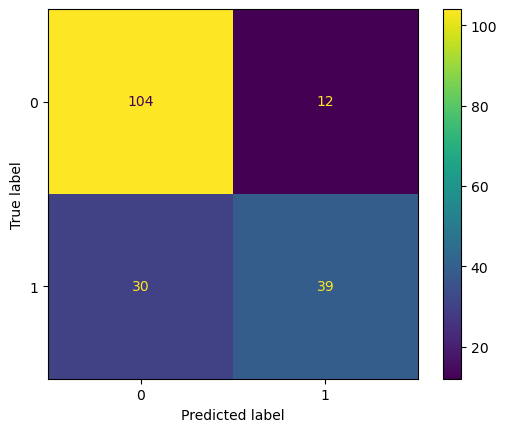

In [26]:
# test het model
y_pred = lg_gs.best_estimator_.predict(X_test)

#plot
cm = confusion_matrix(y_test, y_pred)

TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
accuracy = (TN + TP) / (TN + FP + TP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2* precision * recall / (precision + recall)
print(f"Accuracy Score: {accuracy * 100:.2f}%")
print(f"Precision Score: {Precision * 100:.2f}%")
print(f"Recall Score: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")

disp = ConfusionMatrixDisplay(cm)
disp.plot()
display(cm)

## Decision Tree

Het doel is om diabetes voorspellen. Dat doet een Decision Tree door een reeks vragen te stellen en gegevens op te delen op basis van de antwoorden die worden gegeven op die vragen. Splitsingscriteria zijn de basiscomponenten van een Decision Tree-model waarmee het de dataset opdeelt in verschillende groepen. Deze criteria worden gevormd door de vragen die het model stelt op basis van de beschikbare gegevens.

Een Decision Tree begint met een vraag die het model in staat stelt om de dataset in twee groepen te splitsen en eindigt ermee dat een zo groot mogelijk deel van de mensen die diabetes hebben worden gedetecteerd. Laten we bijvoorbeeld als eerste vraag van het model 'Is de leeftijd van de persoon ouder dan 30 jaar?' nemen. Dit leidt tot twee takken in de beslissingsboom: één voor mensen jonger dan 30 en één voor mensen van 30 jaar en ouder, waarbij oudere mensen mogelijk een hoger risico op diabetes hebben.

Op basis van het gegeven antwoord richt het model zich vervolgens op de tak van mensen die jonger of ouder dan 30 zijn. Het model stelt een nieuwe vraag, bijvoorbeeld: 'Is de BMI van de persoon hoger dan 25?' Op basis van het antwoord op deze vraag splitst het model deze tak verder in twee sub-takken: één voor mensen met een BMI hoger dan 25 (die mogelijk een verhoogd risico op diabetes hebben) en één voor mensen met een BMI van 25 of lager (die mogelijk een lager risico op diabetes hebben).

Op dezelfde manier stelt het Decision Tree-model vragen en maakt het verdere splitsingen op basis van glucosegehalte en andere relevante gegevens, totdat het model bij de uiteindelijke bladeren van de Decision Tree uitkomt. Een blad in de Decision Tree is een eindpunt van de boom, waar geen verdere splitsingen plaatsvinden. Deze bladeren vertegenwoordigen de uiteindelijke beslissingen van het model. Een blad in de Decision Tree kan bijvoorbeeld het volgende aangeven: 'Deze persoon heeft een hoog risico op diabetes.' Het Decision Tree-model helpt ons dus stapsgewijs bij het identificeren van personen met verschillende risiconiveaus voor diabetes.

Het belangrijkste aspect van beslissingsbomen is dat ze slimme vragen stellen om gegevens te sorteren, waardoor men uiteindelijk goed onderbouwde beslissingen kan nemen. Het proces van vragen stellen en splitsen wordt aangedreven door wiskundige algoritmen die helpen bij het vinden van de meest nuttige vragen op basis van de beschikbare gegevens.

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


# Maak een DecisionTreeClassifier-object
dtc = DecisionTreeClassifier(random_state=42)

In [28]:
param = {
    "ccp_alpha" : [0.0, 0.002, 0.004, 0.006, 0.008, 0.01, 0.12, 0.14, 0.16, 0.18, 0.2],
    "criterion" : ["gini", "entropy"]
}

We gaan de Decision Tree optimaliseren door verschillende hyperparameters te verkennen. De twee hyperparameters die we aanpassen zijn ccp_alpha en criterion.

- ccp_alpha: ccp_alpha regelt de complexiteit van de Decision Tree via een proces genaamd "pruning" oftewel snoeien. Pruning is belangrijk, omdat het helpt om overfitting te voorkomen. Overfitting treedt op wanneer de boom te diep gaat en zich te veel aanpast aan de trainingsgegevens, waardoor het model slechte resultaten behaalt bij nieuwe, ongeziene gegevens. Naast overfitting heb je ook nog underfitting. Underfitting treedt op als de boom te eenvoudig is en de trainingsgegevens niet goed kan classificeren. De ccp_alpha-parameter stelt een kostenniveau in voor het snoeien van takken in de boom. Het experimenteren met verschillende waarden van ccp_alpha helpt ons de juiste balans te vinden tussen de complexiteit en de prestatie van het model.

- criterion: criterion bepaalt hoe de boom beslist welke splitsing het beste is. Er zijn twee opties, namelijk "gini" en "entropy." Gini is over het algemeen iets sneller dan entropy. Het is lastig van tevoren te meten welke van de twee beter zal presteren in een specifieke situatie. Daarom testen we beide criteria om te zien welke het beste resultaat oplevert.

In [29]:
dtc_gs = GridSearchCV(estimator = dtc,
                 param_grid = param,
                 cv = 5,
                 refit = "f1",
                 verbose = 1)

We gebruiken GridSearchCV om de beste hyperparameters voor onze Decision Tree Classifier te vinden. Dit wordt gedaan door een reeks combinaties van hyperparameters te proberen en de beste te selecteren op basis van de gekozen metric, in ons geval de F1-score.

In [30]:
dtc_gs.fit(X_train, y_train)
print("best params:",dtc_gs.best_params_)
print("f1-score:",dtc_gs.best_score_)

Fitting 5 folds for each of 22 candidates, totalling 110 fits
best params: {'ccp_alpha': 0.01, 'criterion': 'gini'}
f1-score: 0.7763611491108071


We hebben de hyperparameters geoptimaliseerd en hebben de beste combinatie gevonden. Hier zijn de resultaten:
- Beste parameters: `ccp_alpha: 0.001` en `criterion: gini`.
- Beste F1-score: 0.7763611491108071

<AxesSubplot:>

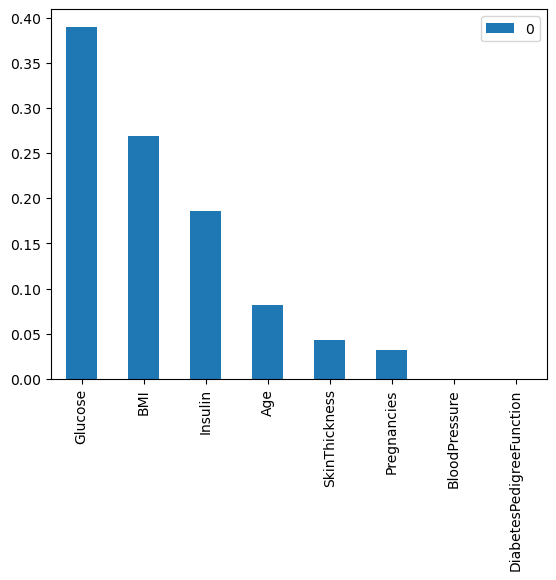

In [31]:
pd.DataFrame(dtc_gs.best_estimator_.feature_importances_, index = X_train.columns).sort_values(0, ascending=False).plot(kind='bar')


De bovenstaande staafgrafiek toont de belangrijkste kenmerken (features) die bijdragen aan de beslissingen van onze beslisboom. Dit kan ons helpen begrijpen welke kenmerken het meest invloedrijk zijn bij de classificatie.


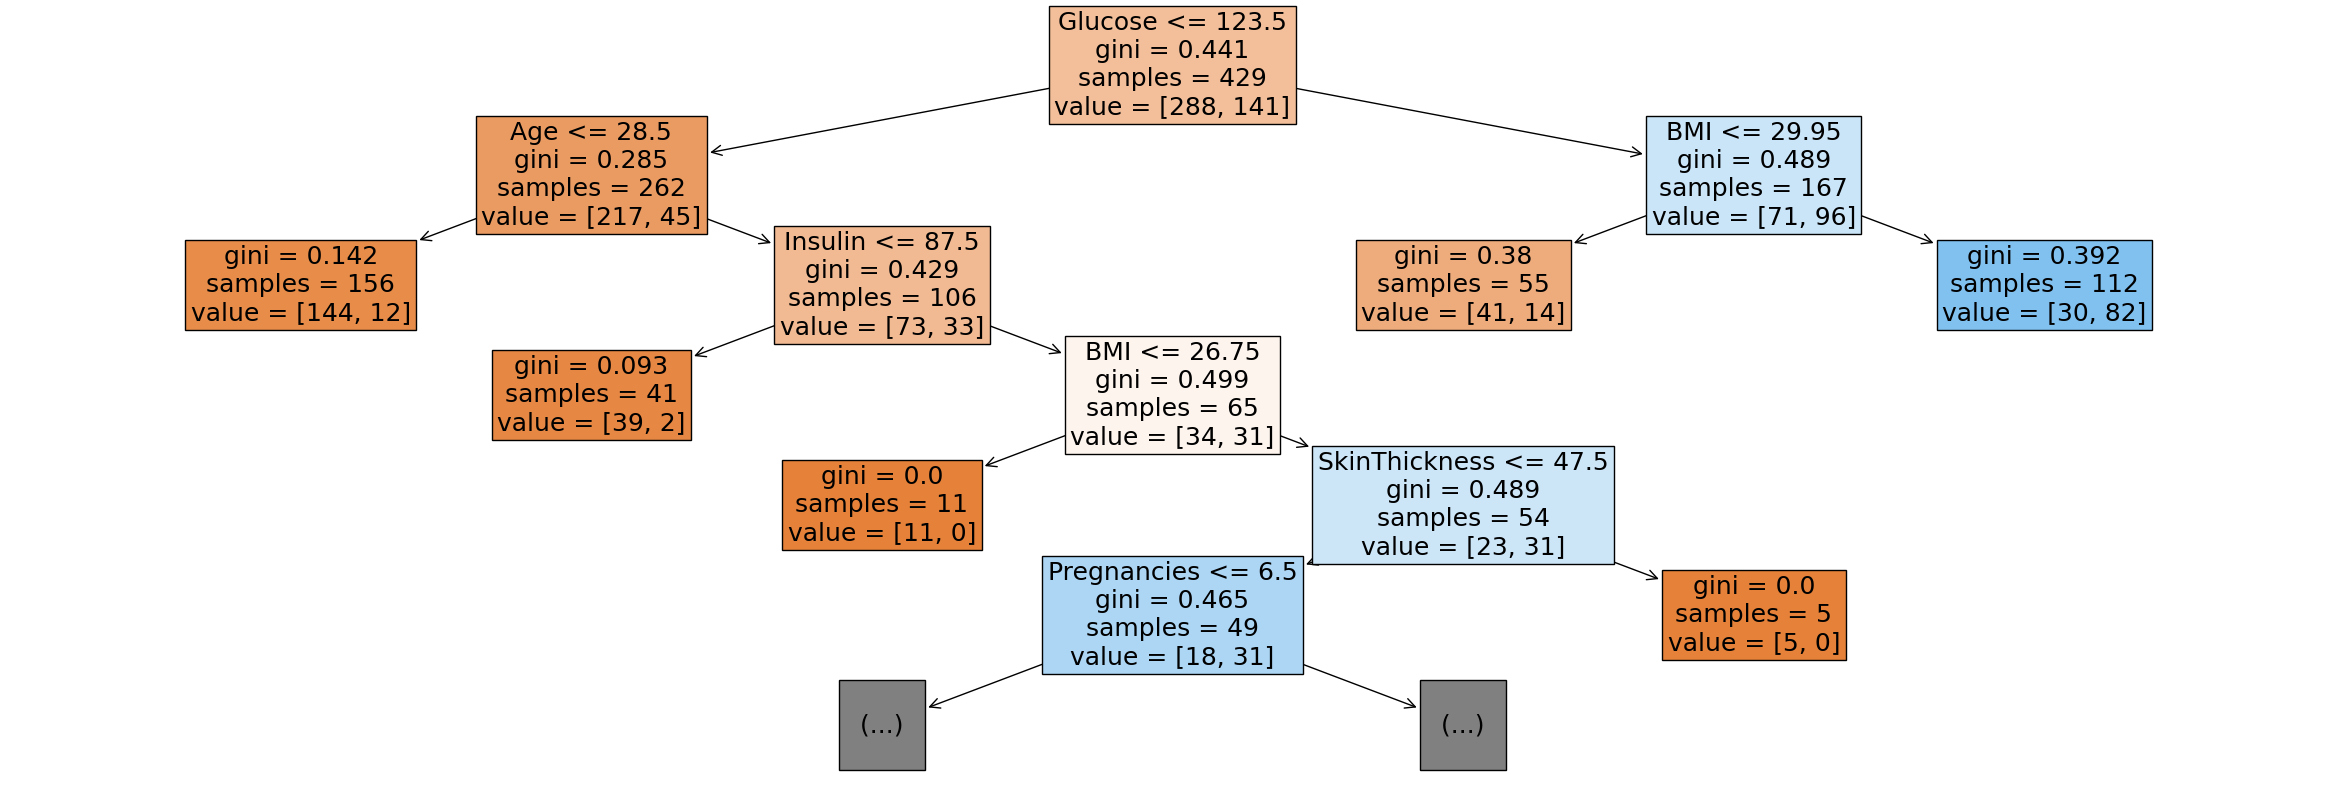

In [32]:
from sklearn.tree import plot_tree
plt.figure(figsize = (30, 10))
plot_tree(dtc_gs.best_estimator_,max_depth = 5, feature_names = X.columns, filled = True, fontsize=18)
plt.show()

De bovenstaande plot toont de beslisboom die is gemaakt door ons model. De boomstructuur bestaat uit knooppunten, waarvan sommige 'internal nodes' zijn (waar beslissingen worden genomen) en andere 'leaves' (waar classificaties worden toegewezen).

De belangrijkste termen in de plot zijn:
- **Features:** De kenmerken (variabelen) die worden gebruikt om beslissingen te nemen.
- **Splitsingscriteria:** De criteria die worden gebruikt om de data op te splitsen, zoals 'gini' of 'entropy'.
- **Gini:** De Gini-index is een maatstaf voor de onzuiverheid van een node.
- **Samples:** Het aantal datapunten in de node.
- **Values:** Het aantal datapunten in elke klasse in de node.

Dit geeft ons inzicht in hoe de beslisboom beslissingen neemt en hoe deze beslissingen leiden tot classificaties.

Accuracy Score: 75.14%
Precision Score: 74.14%
Recall Score: 73.91%
F1-score: 68.92%


array([[88, 28],
       [18, 51]], dtype=int64)

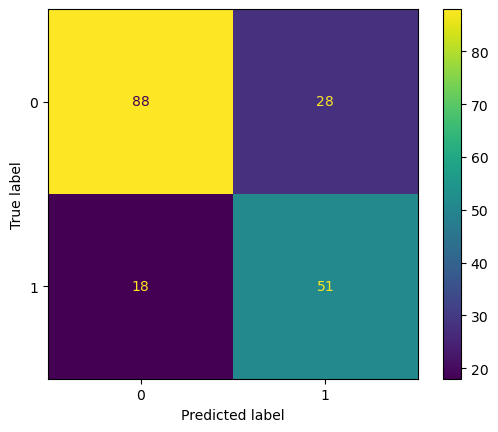

In [33]:
# test het model
y_pred = dtc_gs.best_estimator_.predict(X_test)

#plot
cm = confusion_matrix(y_test, y_pred)

TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
accuracy = (TN + TP) / (TN + FP + TP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2* precision * recall / (precision + recall)
print(f"Accuracy Score: {accuracy * 100:.2f}%")
print(f"Precision Score: {Precision * 100:.2f}%")
print(f"Recall Score: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")

disp = ConfusionMatrixDisplay(cm)
disp.plot()
display(cm)

We hebben nu het getrainde model getest op de testdata en de prestaties geëvalueerd. De resultaten zijn:
- Accuracy Score: 75.14%
- Precision Score: 74.14%
- Recall Score: 73.91%
- F1-score: 68.92%


## Random forest


Het probleem met een Decision Tree is dat het vaak niet erg nauwkeurig is, voornamelijk vanwege overfitting. Als gevolg daarvan kan het moeite hebben om correcte voorspellingen te doen voor nieuwe gegevens die mogelijk enigszins verschillen van de trainingsgegevens. Ondanks pogingen om overfitting te verminderen door middel van pruning, kunnen er nog steeds problemen blijven bestaan. Het kan bijvoorbeeld moeite hebben om onderscheid te maken tussen echte patronen en ruis in de trainingsgegevens, wat leidt tot onnauwkeurige voorspellingen bij nieuwe situaties.

Om deze beperkingen van Decision Trees aan te pakken en de performance te verbeteren, komt Random Forest in beeld. Random Forest probeert deze problemen op te lossen door een ensemble van Decision Trees te gebruiken. In plaats van te vertrouwen op slechts één boom, maakt een Random Forest gebruik van meerdere bomen. Elk van deze bomen wordt getraind op een willekeurige subset van de trainingsgegevens en maakt onafhankelijke voorspellingen. Vervolgens worden deze voorspellingen samengevoegd door middel van een meerderheidsstemming.

Door de voorspellingen van meerdere Decision Trees te combineren, ontstaat een robuuster model dat beter in staat is om nieuwe gegevens te generaliseren en dat minder gevoelig is voor subtiele variaties in de gegevens. Hierdoor kunnen Random Forests nauwkeurigere voorspellingen doen (StatQuest, 2018, February 5).

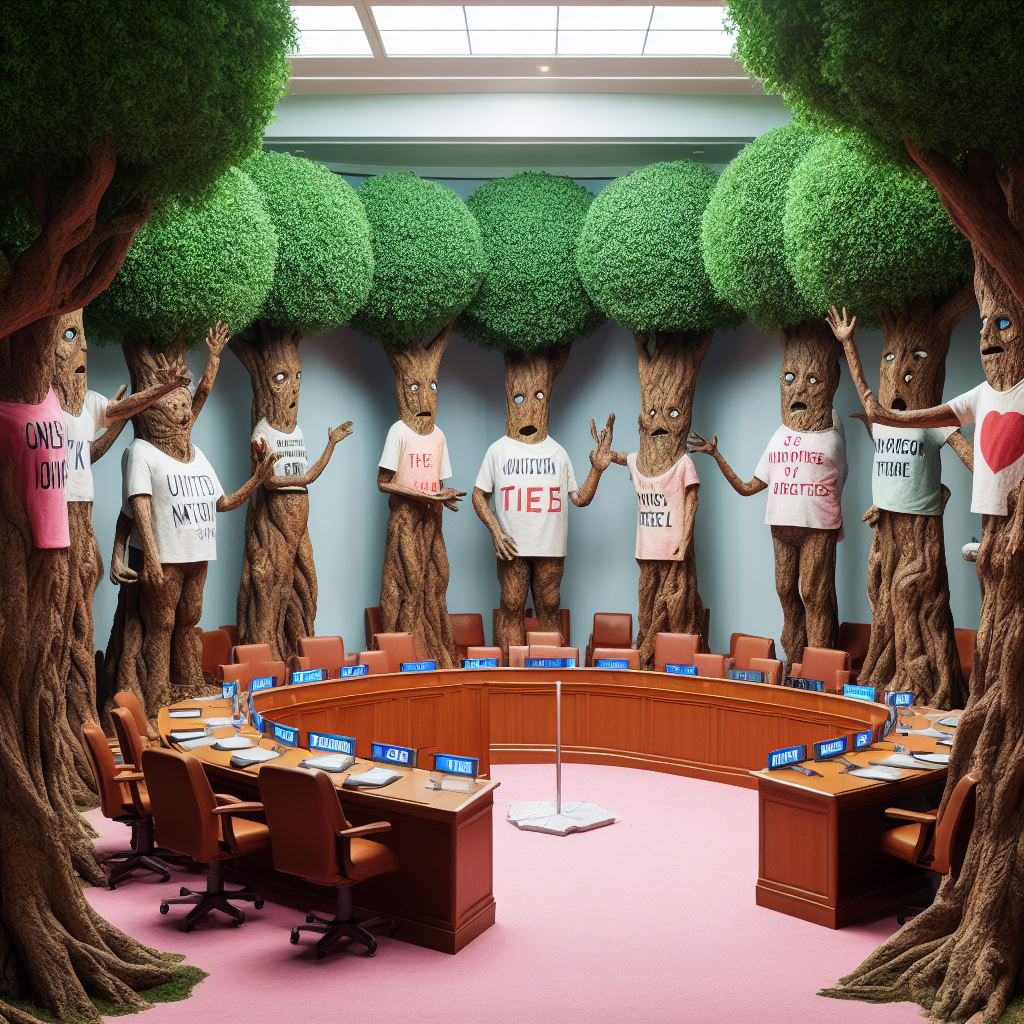

In [34]:
display(Image.open("tree_un.JPG"))

Het bovenstaande beeld laat zien hoe meerdere beslissingsbomen intensief overleggen in iets dat lijkt op een setting van de VN-Veiligheidsraad. Deze beslissingsbomen richten zich niet op geopolitiek, maar beoordelen wie diabetes heeft en wie niet. Aan het einde van het debat brengen ze een stem uit over de aanwezigheid van diabetes bij elke persoon. Dit alles samen vormt een Random Forest-model. Het bovenstaande plaatje is gemaakt door dalle 3.

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_jobs=-1, random_state=44)
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=44)

In [36]:
param = {
    'bootstrap': [True, False],
     'n_estimators': [200, 400, 600, 800, 1000],
     'ccp_alpha': [0.0, 0.002, 0.004, 0.006, 0.008, 0.01, 0.12, 0.14, 0.16, 0.18, 0.2],
     'criterion': ['gini', 'entropy']
}


(ccp_alpha en criterion hebben wij al bij Decision Tree uitgelegd)

Bootstrap is een statistische techniek die wordt gebruikt in het trainingsproces van de individuele Decision Trees binnen een Random Forest. Het idee achter bootstrap is om willekeurige steekproeven te genereren uit de oorspronkelijke trainingsgegevens. Deze steekproeven zijn van dezelfde grootte als de oorspronkelijke gegevens, maar kunnen overlappen en bevatten willekeurige selecties van datapunten. Het doel is om diversiteit te creëren in de trainingsgegevens voor elke afzonderlijke Decision Tree.

Door bootstrap te gebruiken, krijgen de bomen binnen een Random Forest verschillende perspectieven op de gegevens, omdat elk van hen is getraind op een unieke steekproef. Hierdoor kunnen ze verschillende patronen en kenmerken in de gegevens identificeren. Het helpt ook om overfitting te verminderen, omdat geen enkele boom de volledige dataset ziet en zich daardoor niet te sterk kan aanpassen aan specifieke details.

"n_estimators" is een parameter die de gebruiker instelt bij het maken van een Random Forest-model. Het vertegenwoordigt eenvoudigweg het aantal Decision Trees dat in het ensemble wordt opgenomen. Met andere woorden, het geeft aan hoeveel afzonderlijke bomen er in de Random Forest moeten worden getraind.

Een groter aantal "n_estimators" leidt meestal tot een robuuster Random Forest-model. Dit komt doordat meer bomen betekent dat het ensemble meer diversiteit en stabiliteit heeft. Het vergroten van het aantal bomen kan de nauwkeurigheid van het model verbeteren, maar het kan ook leiden tot een toename van de rekentijd die nodig is voor training en voorspellingen.

In [37]:
rfm_gs = GridSearchCV(estimator = rf_model,
                 param_grid = param,
                 cv = 5,
                 refit = "f1",
                 verbose = 1)

In [38]:
rfm_gs.fit(X_train, y_train)
print("best params:",rfm_gs.best_params_)
print("f1-score:",rfm_gs.best_score_)

Fitting 5 folds for each of 220 candidates, totalling 1100 fits
best params: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'entropy', 'n_estimators': 200}
f1-score: 0.7924760601915184


We hebben de hyperparameters geoptimaliseerd en hebben de beste combinatie gevonden. Hier zijn de resultaten:
- Beste parameters: `bootstrap: False`, `ccp_alpha: 0.0`, `criterion: entropy` en `n_estimators: 200`.
- Beste F1-score: 0.7924760601915184

<AxesSubplot:>

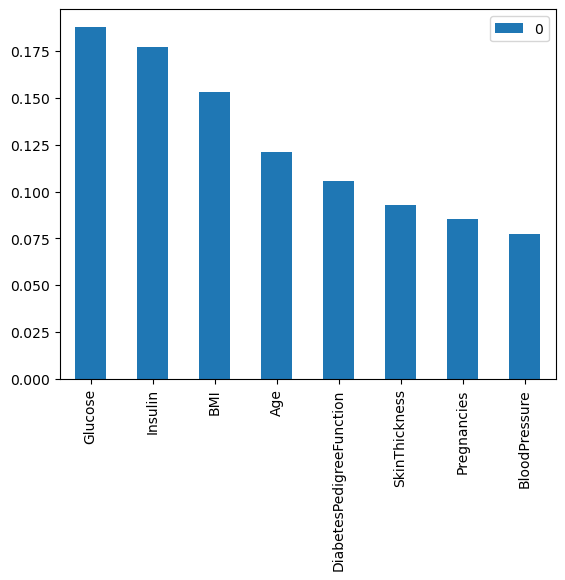

In [39]:
pd.DataFrame(rfm_gs.best_estimator_.feature_importances_, index = X_train.columns).sort_values(0, ascending=False).plot(kind='bar')

Accuracy Score: 79.46%
Precision Score: 74.14%
Recall Score: 68.12%
F1-score: 71.21%


array([[100,  16],
       [ 22,  47]], dtype=int64)

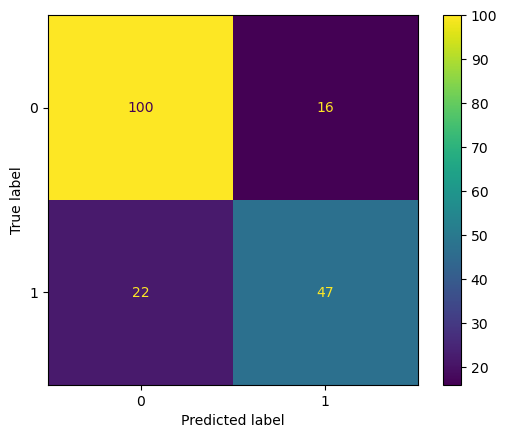

In [40]:
# test het model
y_pred = rfm_gs.best_estimator_.predict(X_test)

#plot
cm = confusion_matrix(y_test, y_pred)

TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
accuracy = (TN + TP) / (TN + FP + TP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2* precision * recall / (precision + recall)
print(f"Accuracy Score: {accuracy * 100:.2f}%")
print(f"Precision Score: {Precision * 100:.2f}%")
print(f"Recall Score: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")

disp = ConfusionMatrixDisplay(cm)
disp.plot()
display(cm)

We hebben nu het getrainde model getest op de testdata en de prestaties geëvalueerd. De resultaten zijn:

Accuracy Score: 79.46%

Precision Score: 74.14%

Recall Score: 68.12%

F1-score: 71.21%


Zoals te zien is, heeft dit model een hogere F1-score dan een enkele boom. Het valt echter op dat ccp_alpha 0.0 is, wat betekent dat er geen pruning is toegepast. Hierdoor vertoont het model enige mate van overfitting, wat te merken is aan de F1-score van 80% op de trainingsset en 71% op de testset. We zullen proberen de testset-score te verbeteren door de optie ccp_alpha 0.0 te verwijderen. Om het trainingsproces te versnellen verwijderen we ook alle opties na 0.01 te. Terwijl we bezig zijn, zullen we ook de n_estimators parameter verfijnen. 






In [41]:
param = {
    'bootstrap': [True, False],
     'n_estimators': [400, 500, 600, 700, 800],
     'ccp_alpha': [0.002, 0.004, 0.006, 0.008, 0.01],
     'criterion': ['gini', 'entropy']
}


In [42]:
rfm_gs2 = GridSearchCV(estimator = rf_model,
                 param_grid = param,
                 cv = 5,
                 refit = "f1",
                 verbose = 1)

In [43]:
rfm_gs2.fit(X_train, y_train)
print("best params:",rfm_gs2.best_params_)
print("f1-score:",rfm_gs2.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
best params: {'bootstrap': False, 'ccp_alpha': 0.008, 'criterion': 'entropy', 'n_estimators': 600}
f1-score: 0.7879616963064295


Hier zijn de resultaten:
- Beste parameters: `bootstrap: False`, `ccp_alpha: 0.008`, `criterion: entropy` en `n_estimators: 600`.
- Beste F1-score: 0.7879616963064295

Accuracy Score: 83.24%
Precision Score: 74.14%
Recall Score: 71.01%
F1-score: 75.97%


array([[105,  11],
       [ 20,  49]], dtype=int64)

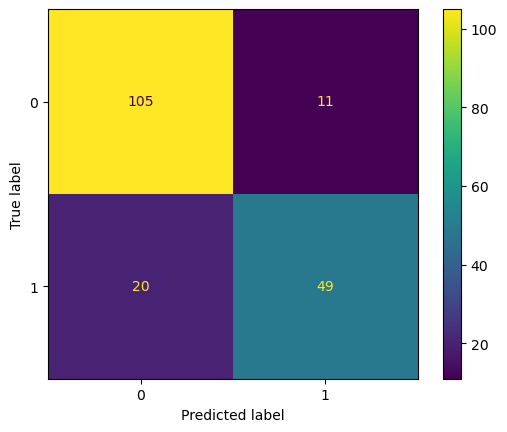

In [44]:
# test het model
y_pred = rfm_gs2.best_estimator_.predict(X_test)

#plot
cm = confusion_matrix(y_test, y_pred)

TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
accuracy = (TN + TP) / (TN + FP + TP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2* precision * recall / (precision + recall)
print(f"Accuracy Score: {accuracy * 100:.2f}%")
print(f"Precision Score: {Precision * 100:.2f}%")
print(f"Recall Score: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")

disp = ConfusionMatrixDisplay(cm)
disp.plot()
display(cm)

Dit model toont een verbetering.

Accuracy Score: 83.24%

Precision Score: 74.14%

Recall Score: 71.01%

F1-score: 75.97%




## Gradient Boosting

Gradient Boosting is een machine learning techniek die wordt gebruikt voor zowel classificatie als regressie problemen. Het bouwt een sterk voorspellend model (ensemble) door meerdere weak learner modellen (meestal decision trees) te combineren. Gradient Boosting is een iteratief process waarbij elk nieuw toegevoegd model zich richt op het corrigeren van de fouten die de vorige modellen zijn gemaakt. Dit verschijnsel hebben we eerder ook al gezien bij ADA Boosting

Gradient boosting begint met het trainen van een zwak model ( ook wel decision stump genoemd)  om te beginnen met trainen. Nadat het eerste model is getraind worden de residuen (fouten) berekend. Residuen zijn de verschillen tussen de werkelijke waarden (y_test) en de voorspellingen (y_pred). Met als doel om de fouten die het eerste model heeft gemaakt te verminderen. Daarna wordt er bij het volgende model/stump geprobeerd om de fouten van het vorige model te corrigeren. Dat geschiedt door te trainen op de residuen als de nieuwe doelvariabelen. Dit process word een x-aantal keer herhaald. Elk opvolgende model probeert  de fouten van de vorige te corrigeren

Hierbij kun je nog de learning rate aanpassen om de bijdrage van elk model te controlleren, Een lagere learning rate maakt het ensemble robuuster maar vereist meer modellen (meer bomen/decision trees) om tot optimale prestaties te komen.

Men kan ook overfitting voorkomen in het geval dat het aantal bomen te groot is  of de bomen te diep zijn. Hiertoe kunnen we  regularisaties toevoegen zoals de max_depth en het minimum aantal monsters per blad (zoek dit nog verder uit).

Na de training van de ensemble kan het worden gebruikt om voorspellingen te doen ten behoeve van nieuwe data. De voorspellingen van alle bomen worden dan bij elkaar opgeteld om de uiteindelijke voorspelling te generen (StatQuest, 2019, March 25)



In [45]:
from sklearn.ensemble import GradientBoostingClassifier

gboost = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': [1.0, 'sqrt', 'log2', None]
 
}

grid = GridSearchCV(estimator=gboost, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

print(grid.best_params_)
print("f1-score:",grid.best_score_)

{'learning_rate': 0.5, 'max_depth': 4, 'max_features': None, 'n_estimators': 100, 'subsample': 1.0}
f1-score: 0.7995075239398084


Hier zijn de resultaten:
- Beste parameters: `learning_rate`  `max_depth`  `max_features'` `n_estimators` `subsample`
- Beste F1-score:  0.7949384404924761

De pruning van het model doen we doormiddel van de "max_depth" en de "Subsample" parameters te hypertunen en mee te nemen. Door de waardes van max_depth kleiner te maken worden de complexiteit van de bomen kleiner en dit verminderd overfitting. Wij gebruiken dan ook een max_depth van 3. En bij de parameter "Subsample" verklein je de dataset die wordt gebruikt om elke boom te trainen, dit draagt ook bij bij het verkleinen van overfitting

<AxesSubplot:>

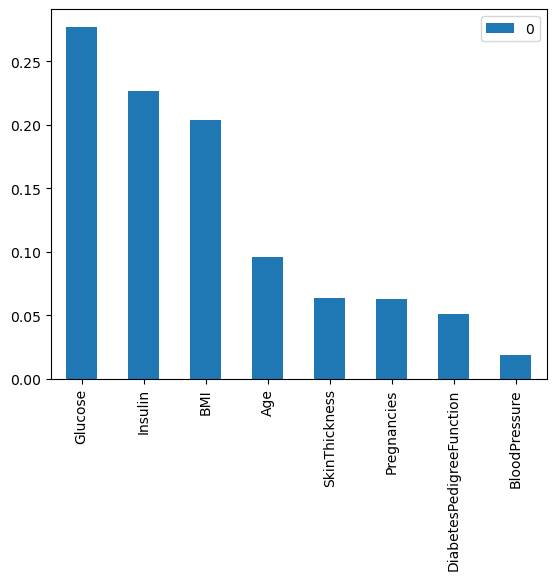

In [46]:
pd.DataFrame(grid.best_estimator_.feature_importances_, index = X_train.columns).sort_values(0, ascending=False).plot(kind='bar')


resultaten zijn:
learning_rate: 0.1, max_depth: 3, max_features: sqrt, n_estimators: 300, subsample: 0.9

In [47]:
best_gboost = grid.best_estimator_
best_gboost.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=4)

{'learning_rate': 0.1, 'max_depth': 4, 'max_features': 1.0, 'n_estimators': 100, 'subsample': 0.9}


Accuracy Score: 77.30%
Precision Score: 74.14%
Recall Score: 68.12%
F1-score: 69.12%


array([[96, 20],
       [22, 47]], dtype=int64)

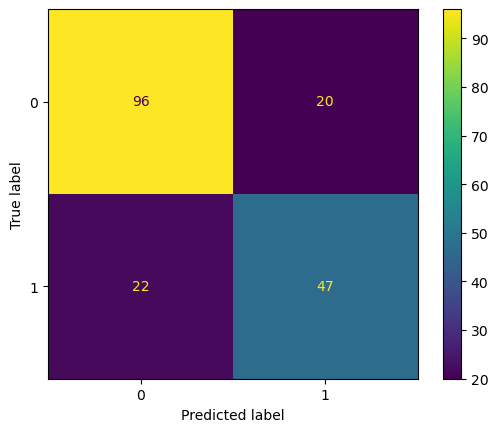

In [48]:
# test het model
y_pred = best_gboost.predict(X_test)

#plot
cm = confusion_matrix(y_test, y_pred)

TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
accuracy = (TN + TP) / (TN + FP + TP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2* precision * recall / (precision + recall)
print(f"Accuracy Score: {accuracy * 100:.2f}%")
print(f"Precision Score: {Precision * 100:.2f}%")
print(f"Recall Score: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")

disp = ConfusionMatrixDisplay(cm)
disp.plot()
display(cm)

Accuracy Score: 82.16%

Precision Score: 74.14%

Recall Score: 73.91%

F1-score: 75.56%


## ADA Boosting

ADA Boosting

ADA Boost is een krachtig algoritme dat word gebruikt voor classificatieproblemen. Het doel van ADA Boost is om de prestaties van zwakke classificatoren te verbeteren door ze te combineren tot een sterke ensemble-classifier. ADA Boost bevat elementen van Decisiontrees en Random Forest. Random forest maakt bijvoorbeeld elke keer een full-sized boom aan, waarbij sommige bomen misschien groter zijn dan anderen maar er van tevoren een bepaalde Max Depth is bepaald. ADA boosting gebruikt aan de andere hand  bomen die alleen een "node" en 2 "leafs" bevatten. Dit noemen we ook wel een "stump". Stumps zijn niet goed in het maken van accurate classificaties en in sommige gevallen zijn ze zelfs slechter in het maken van classificaties dan wanneer iemand zou gokken en daarom worden ze ook wel "weak learners" genoemd. Desondanks zijn juist stumps de basis waarop ADA Boost doorbouwt om de prestaties te verbeteren. 


Stel, je hebt een dataset met 4 variable kolommen, Een decision tree zou  gebruik maken van alle 4 variabelen om een besluit (decision) te nemen. Maar een Stump kan maar 1 variable gebruiken om een decision te maken. In een Random forest heeft elke tree een gelijke vote op de classificatie in contrast bij een Forest gemaakt van stumps zoals ADA Boost maakt, hebben sommige stumps meer invloed op de classificatie. En bij Random forest maakt de volgorde van de bomen die gemaakt zijn niet uit, bij ADA Boost is de volgorde WEL belangrijk dit komt namelijk omdat de fouten die de eerste stump maakt heeft invloed op hoe de tweede stump wordt gemaakt, en de erros die de tweede stump maakt hebben dan weer invloed in hoe de derde stump word gemaakt. Dus kort samengevat, ADA Boost combineert een hoop "Weak learners" om classificaties te maken. De "Weak Learners" zijn bijna altijd stumps. Sommige stumps in het model hebben meer invloed op de classificatie dan anderen en elke stump wordt gemaakt aan de hand van de errors/fouten die de vorige stump heeft gemaakt dus dit zorgt voor "weight" aan de stumps

Werking van ADA Boost. Eerst worden de "weights" van de trainings samples gelijk ingesteld zodat elke sample evenveel weight/invloed heeft. Voor elke iteratie/stump word een weak classifier getraint en de "weight" van de verkeerd geclassificeerde samples worden verhoogd. De weak classifier krijgt gewicht op basis van zijn prestaties, betere classifiers (stump) krijgen een groter "weight". De gewichten van de trainings samples worden opnieuw berekend op basis van de fouten van de huidige classifier (stump). Samples die verkeerd zijn geclassificeerd (dus errors bevatten) krijgen hogere "weight". Daarna worden de zwakke classifiers (stumps) gecombineerd tot een sterke ensemble-classifier door de uitvoering te wegen. De eindbeslissing wordt genomen op basis van de cumulatieve gewogen uitvoering van alle classifiers

#### Verschillen tussen ADA Boosting en Gradient Boosting
Hoewel ADA Boosting en Gradient Boosten erg op elkaar lijken qua aanpak zijn er toch nog wel verschillen die we hebben opgemerkt

In plaats de gewichten aanpassen van de samples zoals ADA Boosting doet, kijkt Gradient Boosting meer naar de fouten van de vorige stap bij elke stap wordt er weer een nieuwe Weak learner getraint op de fouten van de vorige learner

Bij Gradient boosting worden er wel vaak Stumps gebruikt als weak learners zoals bij ADA Boosting, maar Gradient boosting kan ook dieper zijn dan stumps. Gradient boosting kan je hierdoor ook worden gecombineerd met andere algoritmes

samengevat: De methodes zijn best identiek maar de manier dat ze hun prestaties verbeteren is anders (StatQuest, 2019, January 14).






### Implementatie



In [49]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=51)
param_grid_dtc = params = {
    'max_depth': [1, 2, 3, 4, 5],
    'criterion': ["gini", "entropy","log_loss"],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': ["auto","sqrt","log2"]
}
grid_dtc = GridSearchCV(estimator=dtc,param_grid=param_grid_dtc,cv=5)
grid_dtc.fit(X_train,y_train)
best_dtc = grid_dtc.best_estimator_
best_dtc


DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='log2',
                       min_samples_leaf=5, random_state=51)

Hier zijn de resultaten:
- Beste parameters: `entropy` , `max_depth` , `max_features` ,`min_samples_leaf` 


In [50]:
ada = AdaBoostClassifier(base_estimator=best_dtc,random_state=42)  

param_grid = {
    'n_estimators': [30, 50, 70, 100],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
}

grid = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

{'learning_rate': 0.05, 'n_estimators': 100}
0.7972093023255814


Hier zijn de resultaten:
- Beste parameters: `learning_rate` , `n_estimators`  
- Beste F1-score:  0.7972093023255814

{'learning_rate': 0.05, 'n_estimators': 100}
0.7972093023255814

<AxesSubplot:>

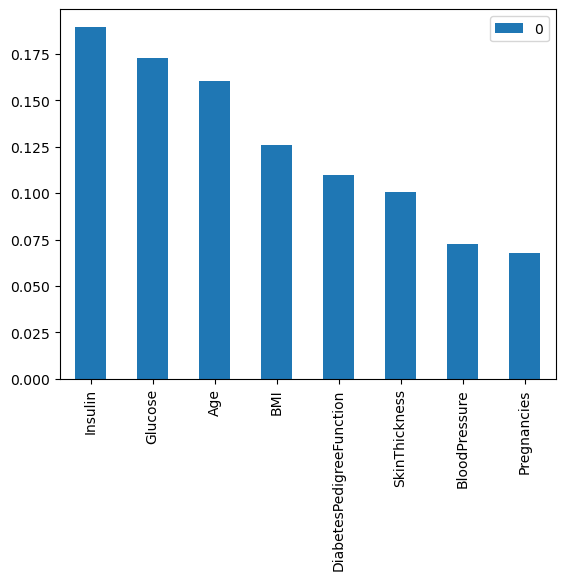

In [51]:
pd.DataFrame(grid.best_estimator_.feature_importances_, index = X_train.columns).sort_values(0, ascending=False).plot(kind='bar')


In [52]:
best_ada = grid.best_estimator_

best_ada.fit(X_train, y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=3,
                                                         max_features='log2',
                                                         min_samples_leaf=5,
                                                         random_state=51),
                   learning_rate=0.05, n_estimators=100, random_state=42)

{'estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.01, 'n_estimators': 70}


In [53]:
from sklearn.metrics import accuracy_score

y_pred = best_ada.predict(X_test)

print("f1_score:", f1_score(y_test, y_pred))


f1_score: 0.6766917293233083


f1_score: 0.7007299270072992


## SVM

SVM is een machine learning algoritme dat wordt gebruikt voor lineare of niet-lineare classificatie en regressie. SVM is erg aanpasbaar en efficiënt omdat het hoge-dimensie data en non-lineare data aan kan en dit is hoe het in zijn werking gaat:

Stel je voor dat je een ruimte hebt waarin je twee klassen in verdeeld. Je wilt deze punten scheiden zodat je kunt beslissen to welke klassen een nieuw datapunt zou behoren op basis van de positie in de ruimte. Hierbij zou de ideale situatie zijn dat er een rechte lijn is (2D) die deze 2 klassen perfect scheidt zonder datapunten die aan de verkeerde helft bevinden. Alleen nu komt de echte uitdaging: er kunnen oneindig veel scheidingslijnen zijn. Welke kies je? Waar we dan naar willen kijken is de lijn (hyperplane) die de groots mogelijke afstand (marge) heeft tot de dichtsbijzijnde punten van de klassen. De dichtsbijzijnde van beide klassen worden de "Support Vectors" genoemd. Deze support vectors ondersteunen de scheidingslijn (hyperplane)  (StatQuest, 2019, September 30) 

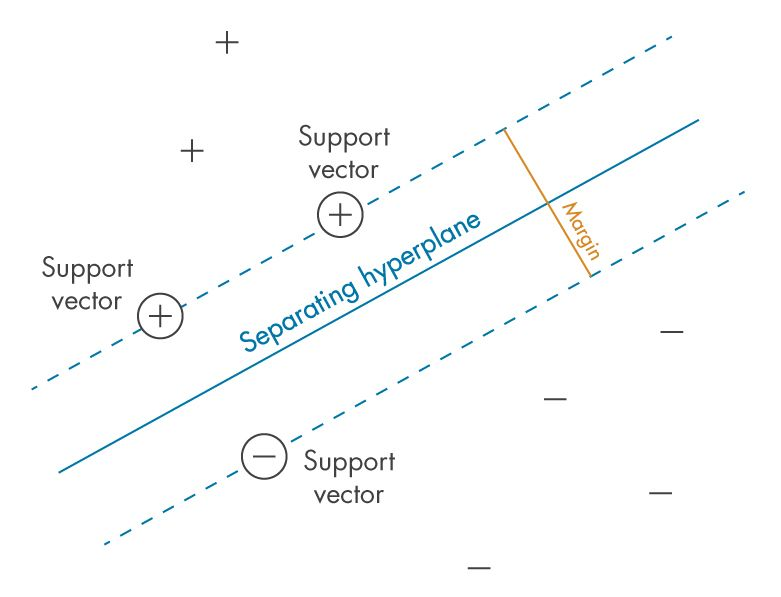

Hierbij het doel ook om de marge zo groot mogelijk te houden zodat de nieuwe datapunten zo precies mogelijk kunnen worden geplaats aan de goeie kant van de scheidingslijn


### Kerneltrick
Maar in veel realistische situaties zijn gegevens niet perfect linear scheidbaar. Hier introduceerd SVM de "kernel trick". Stel je voor dat je in een tweedimensionale ruimte werkt (Dus gewoon een vlak met een x-as en y-as). Maar je kunt de gegevens niet scheiden met een lineare lijn, echter als je de gegevens kon 'optillen' naar een driedimensionale ruimte kun je de data misschien wel linear opsplitsen. Dit optillen van de gegevens in een nieuwe dimensie noemen we een "kernel", hierbij heb je ook een aantal verschillende kernels om uit te kiezen:

### Lineaire Kernel:
Deze kernel is eigenlijk de standaard inner product tussen twee vectoren. Het wordt gebruikt wanneer de gegevens lineair scheidbaar zijn in de originele ruimte.

$$
K(x, y) = x^T y
$$

---

### Polynomiale Kernel:
Hierbij zijn &gamma;, r  en d parameters van de kernel. Een polynomiale kernel van graad d brengt de invoerdata naar een ruimte van de corresponderende orde van veeltermen. Het wordt gebruikt wanneer de gegevens een niet-lineaire maar wel een polynomiale grens hebben.

$$
K(x, y) = (\gamma x^T y + r)^d
$$

---

### Radial Basis Function (RBF) of Gaussian Kernel:
RBF is een zeer populaire keuze voor SVM en werkt vaak goed in de praktijk voor veel problemen. Het kan complexe grenzen modelleren en wordt gebruikt wanneer er geen duidelijke aanwijzing is over de functionele vorm van de beslissingsgrens.

$$
K(x, y) = e^{-\gamma ||x - y||^2}
$$

---

### Sigmoid Kernel:
Deze kernel transformeert de gegevens in een manier die vergelijkbaar is met de sigmoid-functie in neurale netwerken. Het kan worden gebruikt in de context van neurale SVM's.

$$
K(x, y) = \tanh(\gamma x^T y + r)
$$

Hierbij zijn de symbolen:
* X, Y: De invoer vectoren
* $x^T$: Is de Transpose van vector X
* $\gamma$: Een schalings factor ook wel gamma genoemd, helpt bij het maken van de hyperplane en de capaciteit van het model
* $d$: de graad van de polynoom, in makkelijke zin hoe complex de krommen en bochten zijn van de lijn
* $r$: een verschuivingsfactor vaak ingesteld op 1, dit helpt soms met een betere scheiding tussen datapunten

(StatQuest, September 30)(Visually Explained)




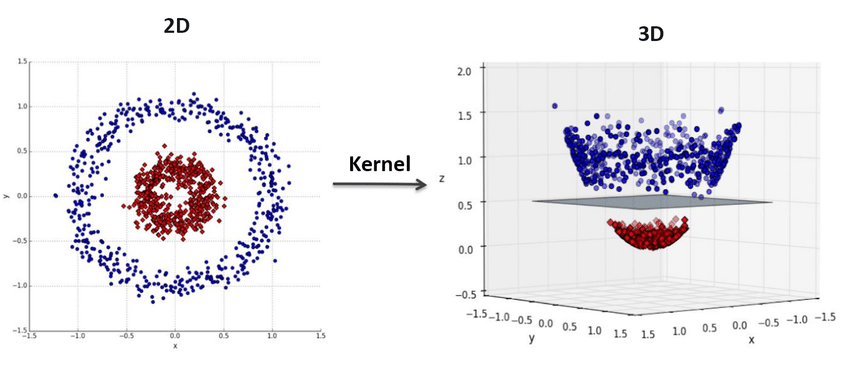


## Loss Function

Met de Loss Function in SVM proberen we een hyperplane te vinden dat de 2 data klassen scheidt en tegerlijkertijd de marge tussen de hyperplane en Support vectors te maximaliseren

De kostenfunctie genaamd de "hinge loss" wordt als volgt gedefineerd:

$$
Hinge Loss=max(0,1−y^{(i)}(w^Tx^{(i)}+b))
$$


- $w$ : De gewichtsvector die de oriëntatie van het hyperplaan bepaalt.

- $b$ : De bias term.

- $x^{(i)}$: Het i datapunt.

- $y^{(i)}$: Het werkelijke label van het i datapunt
- $i$: Het huidig gebruikte datapunt

Als je de Hinge Loss wil berekenen kijken we vooral naar het laatste stuk van de formule $y^{(i)}(w^Tx^{(i)}+b)$ dit kijkt naar hoe correct het punt is geclassificeerd. 

Als een punt correct is geclassificeerd met een grote marge dus "$y^{(i)}(w^Tx^{(i)}+b)$ > 1" , dan is het product groter dan 1 wat resulteerd in een Hinge Loss van "0" wat betekent dat het model de data perfect heeft voorspeld. 

Als het product tussen de 0 en 1 ligt resulteerd het in een positieve loss dus "$y^{(i)}(w^Tx^{(i)}+b)$ < 1", dit houd in dat het niet perfect voorspeld is maar wel redelijk goed sinds dit binnen de marge ligt, en zorgt voor een positieve Hinge loss maar kleiner dan 1

En als het product kleiner dan 0 is dus "$y^{(i)}(w^Tx^{(i)}+b)$ < 0"  is betekent dat het verkeerd is voorspeld (buiten de marge) en dit zou resulteren tot een grotere loss dan 1 


### Regularisatie
In de praktijk wordt de Hinge Loss vaak gecombineerd met regularisatie om "overfitting" te voorkomen dit doen ze door de formule van Hinge loss iets uit te breiden:

$$
\text{Regularisatie} = \frac{1}{2\lambda} ||w||^2 + \frac{1}{m} \sum_{i=1}^{m} \max(0, 1 - y^{(i)} (w^T x^{(i)} + b))
$$


$λ$: een regularisatie parameter, dus L1 Lasso of L2 Ridge. De parameter bepaalt hoe sterk de regularisatie wordt toegepast 

$m$: Het aantal datapunten

De term $\frac{1}{2\lambda} ||w||^2$ is de L1/L2 Regularisatie, dit straft hoge waarden van $w$ gewichten dus moedigt hiermee het model aan kleinere gewichten te hebben

Samenvattend, de vernieuwde formule zoekt naar een balans tussen het vinden van een grote marge (dus minimale Hinge Loss) en het hebben van een eenvoudiger model door het toevoegen van de Regularisatie

In [54]:
from sklearn.svm import SVC
svm_model = SVC(random_state=44)
svm_model.fit(X_train, y_train)

SVC(random_state=44)

Hierbij hebben we getest op alle kernels daarbij zijn we op de conclusie gekomen dat de RBF kernel het beste is voor onze score. Hierbij hebben we wel de kernels weggehaald voor het model omdat het runnen van deze cell rond de 1,5 uur kostte.

In [55]:
param = {
    'C': [0.5, 1, 10, 100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001],
    'kernel': ["rbf"]
    # 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

We voeren hier een gridsearch uit om te kijken wat de beste parameters zijn voor ons model

In [56]:
svc_gs = GridSearchCV(estimator = svm_model,
                 param_grid = param,
                 cv = 5,
                 refit = "f1",
                 verbose = 1)

In [57]:
svc_gs.fit(X_train, y_train)
print("best params:",svc_gs.best_params_)
print("f1-score:",svc_gs.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
best params: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
f1-score: 0.7831190150478797


Hier zijn de resultaten:
- Beste parameters: `C: 10`, `gamma: 0.001`, `kernel: rbf`.
- Beste F1-score: 0.7831190150478797

Accuracy Score: 77.30%
Precision Score: 74.14%
Recall Score: 65.22%
F1-score: 68.18%


array([[98, 18],
       [24, 45]], dtype=int64)

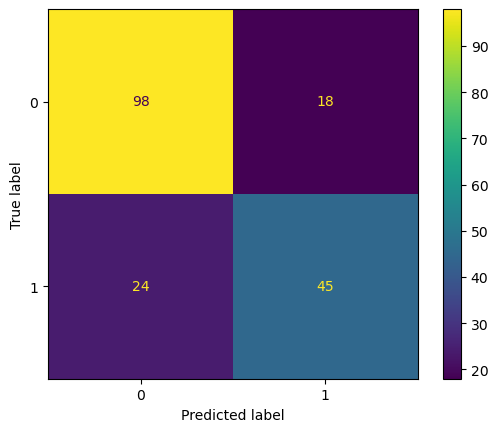

In [58]:
# test het model
y_pred = svc_gs.predict(X_test)

#plot
cm = confusion_matrix(y_test, y_pred)

TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
accuracy = (TN + TP) / (TN + FP + TP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2* precision * recall / (precision + recall)
print(f"Accuracy Score: {accuracy * 100:.2f}%")
print(f"Precision Score: {Precision * 100:.2f}%")
print(f"Recall Score: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")

disp = ConfusionMatrixDisplay(cm)
disp.plot()
display(cm)

Accuracy Score: 77.30%
    
Precision Score: 74.14%
    
Recall Score: 65.22%
    
F1-score: 68.18%

## ANN

De onderstaande informatie over ANN is gebaseerd op door ons bekeken YouTube-filmpjes (Learn with Whiteboard)(codebasics, 2020, September 7) (StatQuest, 2019, January 14)






In [59]:
from sklearn.preprocessing import scale
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

omdat neuron networks veel data nodig hebben. hebben wij besloten om onze test data bij onze train data te zetten en de kaggle test data gebruiken om het model te testen

In [60]:
pip install tensorflow = 2.14


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '='
Hint: = is not a valid operator. Did you mean == ?


In [61]:
!pip install imbalanced-learn

In [62]:
import tensorflow as tf
from tensorflow import keras

ann_model = keras.Sequential([
    keras.layers.Dense(64, input_shape=(8,), activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

ann_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics = ['AUC'])

ann_model.fit(X_train_scaled, y_train, epochs=500)

Epoch 1/500
14/14 [==============================] - 1s 2ms/step - loss: 0.6544 - auc: 0.6647
Epoch 2/500
14/14 [==============================] - 0s 996us/step - loss: 0.5481 - auc: 0.8211
Epoch 3/500
14/14 [==============================] - 0s 995us/step - loss: 0.4917 - auc: 0.8378
Epoch 4/500
14/14 [==============================] - 0s 964us/step - loss: 0.4614 - auc: 0.8475
Epoch 5/500
14/14 [==============================] - 0s 1ms/step - loss: 0.4469 - auc: 0.8568
Epoch 6/500
14/14 [==============================] - 0s 964us/step - loss: 0.4378 - auc: 0.8597
Epoch 7/500
14/14 [==============================] - 0s 14ms/step - loss: 0.4303 - auc: 0.8641
Epoch 8/500
14/14 [==============================] - 0s 990us/step - loss: 0.4232 - auc: 0.8716
Epoch 9/500
14/14 [==============================] - 0s 1ms/step - loss: 0.4157 - auc: 0.8752
Epoch 10/500
14/14 [==============================] - 0s 1ms/step - loss: 0.4104 - auc: 0.8789
Epoch 11/500
14/14 [============================

14/14 [==============================] - 0s 1ms/step - loss: 0.1609 - auc: 0.9889
Epoch 87/500
14/14 [==============================] - 0s 965us/step - loss: 0.1569 - auc: 0.9895
Epoch 88/500
14/14 [==============================] - 0s 1ms/step - loss: 0.1551 - auc: 0.9900
Epoch 89/500
14/14 [==============================] - 0s 1ms/step - loss: 0.1593 - auc: 0.9885
Epoch 90/500
14/14 [==============================] - 0s 989us/step - loss: 0.1538 - auc: 0.9905
Epoch 91/500
14/14 [==============================] - 0s 1ms/step - loss: 0.1484 - auc: 0.9902
Epoch 92/500
14/14 [==============================] - 0s 901us/step - loss: 0.1460 - auc: 0.9913
Epoch 93/500
14/14 [==============================] - 0s 1ms/step - loss: 0.1448 - auc: 0.9913
Epoch 94/500
14/14 [==============================] - 0s 1ms/step - loss: 0.1424 - auc: 0.9926
Epoch 95/500
14/14 [==============================] - 0s 939us/step - loss: 0.1437 - auc: 0.9923
Epoch 96/500
14/14 [==============================] - 0

14/14 [==============================] - 0s 892us/step - loss: 0.0352 - auc: 1.0000
Epoch 171/500
14/14 [==============================] - 0s 921us/step - loss: 0.0366 - auc: 1.0000
Epoch 172/500
14/14 [==============================] - 0s 935us/step - loss: 0.0342 - auc: 1.0000
Epoch 173/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0328 - auc: 1.0000
Epoch 174/500
14/14 [==============================] - 0s 996us/step - loss: 0.0322 - auc: 1.0000
Epoch 175/500
14/14 [==============================] - 0s 944us/step - loss: 0.0319 - auc: 1.0000
Epoch 176/500
14/14 [==============================] - 0s 972us/step - loss: 0.0308 - auc: 1.0000
Epoch 177/500
14/14 [==============================] - 0s 991us/step - loss: 0.0321 - auc: 1.0000
Epoch 178/500
14/14 [==============================] - 0s 932us/step - loss: 0.0307 - auc: 1.0000
Epoch 179/500
14/14 [==============================] - 0s 980us/step - loss: 0.0291 - auc: 1.0000
Epoch 180/500
14/14 [===============

14/14 [==============================] - 0s 1ms/step - loss: 0.0086 - auc: 1.0000
Epoch 255/500
14/14 [==============================] - 0s 964us/step - loss: 0.0083 - auc: 1.0000
Epoch 256/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0080 - auc: 1.0000
Epoch 257/500
14/14 [==============================] - 0s 986us/step - loss: 0.0079 - auc: 1.0000
Epoch 258/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0078 - auc: 1.0000
Epoch 259/500
14/14 [==============================] - 0s 985us/step - loss: 0.0078 - auc: 1.0000
Epoch 260/500
14/14 [==============================] - 0s 975us/step - loss: 0.0076 - auc: 1.0000
Epoch 261/500
14/14 [==============================] - 0s 956us/step - loss: 0.0073 - auc: 1.0000
Epoch 262/500
14/14 [==============================] - 0s 923us/step - loss: 0.0073 - auc: 1.0000
Epoch 263/500
14/14 [==============================] - 0s 977us/step - loss: 0.0072 - auc: 1.0000
Epoch 264/500
14/14 [===================

14/14 [==============================] - 0s 921us/step - loss: 0.0026 - auc: 1.0000
Epoch 339/500
14/14 [==============================] - 0s 928us/step - loss: 0.0025 - auc: 1.0000
Epoch 340/500
14/14 [==============================] - 0s 989us/step - loss: 0.0025 - auc: 1.0000
Epoch 341/500
14/14 [==============================] - 0s 986us/step - loss: 0.0025 - auc: 1.0000
Epoch 342/500
14/14 [==============================] - 0s 968us/step - loss: 0.0024 - auc: 1.0000
Epoch 343/500
14/14 [==============================] - 0s 921us/step - loss: 0.0024 - auc: 1.0000
Epoch 344/500
14/14 [==============================] - 0s 999us/step - loss: 0.0024 - auc: 1.0000
Epoch 345/500
14/14 [==============================] - 0s 883us/step - loss: 0.0023 - auc: 1.0000
Epoch 346/500
14/14 [==============================] - 0s 965us/step - loss: 0.0023 - auc: 1.0000
Epoch 347/500
14/14 [==============================] - 0s 928us/step - loss: 0.0023 - auc: 1.0000
Epoch 348/500
14/14 [=============

14/14 [==============================] - 0s 1000us/step - loss: 0.0010 - auc: 1.0000
Epoch 423/500
14/14 [==============================] - 0s 953us/step - loss: 9.7683e-04 - auc: 1.0000
Epoch 424/500
14/14 [==============================] - 0s 1ms/step - loss: 9.6615e-04 - auc: 1.0000
Epoch 425/500
14/14 [==============================] - 0s 999us/step - loss: 9.4800e-04 - auc: 1.0000
Epoch 426/500
14/14 [==============================] - 0s 977us/step - loss: 9.4105e-04 - auc: 1.0000
Epoch 427/500
14/14 [==============================] - 0s 937us/step - loss: 9.2798e-04 - auc: 1.0000
Epoch 428/500
14/14 [==============================] - 0s 969us/step - loss: 9.1816e-04 - auc: 1.0000
Epoch 429/500
14/14 [==============================] - 0s 853us/step - loss: 9.1718e-04 - auc: 1.0000
Epoch 430/500
14/14 [==============================] - 0s 998us/step - loss: 9.2063e-04 - auc: 1.0000
Epoch 431/500
14/14 [==============================] - 0s 978us/step - loss: 8.9993e-04 - auc: 1.0000

In [63]:
ann_model.evaluate(X_test_scaled, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 1.5685 - auc: 0.7912


[1.5684946775436401, 0.7911669015884399]

In [64]:
yp = ann_model.predict(X_test_scaled)
yp[:5]

6/6 [==============================] - 0s 904us/step


array([[1.7047164e-04],
       [5.1307529e-01],
       [2.9775727e-26],
       [6.1608665e-09],
       [4.4279513e-13]], dtype=float32)

In [65]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

een loepje je om concrete atwoorden te krijgen 1 of 0

Accuracy Score: 73.51%
Precision Score: 74.14%
Recall Score: 63.77%
F1-score: 64.23%


array([[92, 24],
       [25, 44]], dtype=int64)

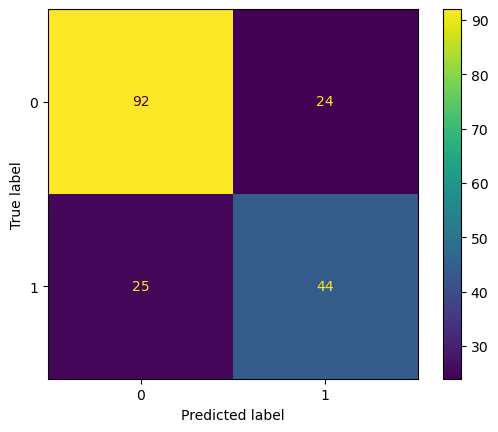

In [66]:
#plot
cm = confusion_matrix(y_test, y_pred)

TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
accuracy = (TN + TP) / (TN + FP + TP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2* precision * recall / (precision + recall)
print(f"Accuracy Score: {accuracy * 100:.2f}%")
print(f"Precision Score: {Precision * 100:.2f}%")
print(f"Recall Score: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")

disp = ConfusionMatrixDisplay(cm)
disp.plot()
display(cm)

68% is acceptable waar wij kunnen beter.



In [67]:
y_train.value_counts()

0.0    288
1.0    141
Name: Outcome, dtype: int64

https://www.youtube.com/watch?v=JnlM4yLFNuo&ab_channel=codebasics

omdat onze dataset imbalanced is kan dat problemen veroorzaken. laten we dat doen door de volgende code uitevoeren.

In [68]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train_scaled, y_train)

y_sm.value_counts()

0.0    288
1.0    288
Name: Outcome, dtype: int64

In [69]:
ann_model = keras.Sequential([
    keras.layers.Dense(64, input_shape=(8,), activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

ann_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics = ['AUC'])

ann_model.fit(X_sm, y_sm, epochs=500)

Epoch 1/500
18/18 [==============================] - 0s 1ms/step - loss: 0.6262 - auc: 0.7478
Epoch 2/500
18/18 [==============================] - 0s 949us/step - loss: 0.5325 - auc: 0.8346
Epoch 3/500
18/18 [==============================] - 0s 846us/step - loss: 0.4931 - auc: 0.8471
Epoch 4/500
18/18 [==============================] - 0s 885us/step - loss: 0.4794 - auc: 0.8549
Epoch 5/500
18/18 [==============================] - 0s 935us/step - loss: 0.4631 - auc: 0.8664
Epoch 6/500
18/18 [==============================] - 0s 917us/step - loss: 0.4519 - auc: 0.8742
Epoch 7/500
18/18 [==============================] - 0s 961us/step - loss: 0.4433 - auc: 0.8785
Epoch 8/500
18/18 [==============================] - 0s 990us/step - loss: 0.4321 - auc: 0.8866
Epoch 9/500
18/18 [==============================] - 0s 902us/step - loss: 0.4233 - auc: 0.8912
Epoch 10/500
18/18 [==============================] - 0s 925us/step - loss: 0.4151 - auc: 0.8951
Epoch 11/500
18/18 [=====================

18/18 [==============================] - 0s 973us/step - loss: 0.0912 - auc: 0.9981
Epoch 86/500
18/18 [==============================] - 0s 827us/step - loss: 0.0868 - auc: 0.9987
Epoch 87/500
18/18 [==============================] - 0s 882us/step - loss: 0.0855 - auc: 0.9986
Epoch 88/500
18/18 [==============================] - 0s 883us/step - loss: 0.0836 - auc: 0.9989
Epoch 89/500
18/18 [==============================] - 0s 885us/step - loss: 0.0811 - auc: 0.9990
Epoch 90/500
18/18 [==============================] - 0s 943us/step - loss: 0.0845 - auc: 0.9988
Epoch 91/500
18/18 [==============================] - 0s 932us/step - loss: 0.0802 - auc: 0.9989
Epoch 92/500
18/18 [==============================] - 0s 928us/step - loss: 0.0765 - auc: 0.9990
Epoch 93/500
18/18 [==============================] - 0s 933us/step - loss: 0.0732 - auc: 0.9994
Epoch 94/500
18/18 [==============================] - 0s 946us/step - loss: 0.0715 - auc: 0.9993
Epoch 95/500
18/18 [=======================

Epoch 169/500
18/18 [==============================] - 0s 912us/step - loss: 0.0123 - auc: 1.0000
Epoch 170/500
18/18 [==============================] - 0s 858us/step - loss: 0.0124 - auc: 1.0000
Epoch 171/500
18/18 [==============================] - 0s 935us/step - loss: 0.0125 - auc: 1.0000
Epoch 172/500
18/18 [==============================] - 0s 905us/step - loss: 0.0113 - auc: 1.0000
Epoch 173/500
18/18 [==============================] - 0s 925us/step - loss: 0.0112 - auc: 1.0000
Epoch 174/500
18/18 [==============================] - 0s 859us/step - loss: 0.0111 - auc: 1.0000
Epoch 175/500
18/18 [==============================] - 0s 899us/step - loss: 0.0109 - auc: 1.0000
Epoch 176/500
18/18 [==============================] - 0s 939us/step - loss: 0.0109 - auc: 1.0000
Epoch 177/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0105 - auc: 1.0000
Epoch 178/500
18/18 [==============================] - 0s 916us/step - loss: 0.0103 - auc: 1.0000
Epoch 179/500
18/18 [=

18/18 [==============================] - 0s 939us/step - loss: 0.0027 - auc: 1.0000
Epoch 253/500
18/18 [==============================] - 0s 919us/step - loss: 0.0027 - auc: 1.0000
Epoch 254/500
18/18 [==============================] - 0s 884us/step - loss: 0.0027 - auc: 1.0000
Epoch 255/500
18/18 [==============================] - 0s 884us/step - loss: 0.0026 - auc: 1.0000
Epoch 256/500
18/18 [==============================] - 0s 941us/step - loss: 0.0026 - auc: 1.0000
Epoch 257/500
18/18 [==============================] - 0s 940us/step - loss: 0.0026 - auc: 1.0000
Epoch 258/500
18/18 [==============================] - 0s 883us/step - loss: 0.0025 - auc: 1.0000
Epoch 259/500
18/18 [==============================] - 0s 862us/step - loss: 0.0025 - auc: 1.0000
Epoch 260/500
18/18 [==============================] - 0s 920us/step - loss: 0.0024 - auc: 1.0000
Epoch 261/500
18/18 [==============================] - 0s 896us/step - loss: 0.0024 - auc: 1.0000
Epoch 262/500
18/18 [=============

18/18 [==============================] - 0s 924us/step - loss: 8.5683e-04 - auc: 1.0000
Epoch 336/500
18/18 [==============================] - 0s 927us/step - loss: 8.4695e-04 - auc: 1.0000
Epoch 337/500
18/18 [==============================] - 0s 940us/step - loss: 8.4424e-04 - auc: 1.0000
Epoch 338/500
18/18 [==============================] - 0s 909us/step - loss: 8.3203e-04 - auc: 1.0000
Epoch 339/500
18/18 [==============================] - 0s 1ms/step - loss: 7.8854e-04 - auc: 1.0000
Epoch 340/500
18/18 [==============================] - 0s 880us/step - loss: 7.7461e-04 - auc: 1.0000
Epoch 341/500
18/18 [==============================] - 0s 938us/step - loss: 7.7632e-04 - auc: 1.0000
Epoch 342/500
18/18 [==============================] - 0s 909us/step - loss: 7.7891e-04 - auc: 1.0000
Epoch 343/500
18/18 [==============================] - 0s 969us/step - loss: 7.5315e-04 - auc: 1.0000
Epoch 344/500
18/18 [==============================] - 0s 876us/step - loss: 7.5652e-04 - auc: 1.0

18/18 [==============================] - 0s 918us/step - loss: 3.0643e-04 - auc: 1.0000
Epoch 416/500
18/18 [==============================] - 0s 935us/step - loss: 3.0166e-04 - auc: 1.0000
Epoch 417/500
18/18 [==============================] - 0s 896us/step - loss: 3.0306e-04 - auc: 1.0000
Epoch 418/500
18/18 [==============================] - 0s 922us/step - loss: 3.0024e-04 - auc: 1.0000
Epoch 419/500
18/18 [==============================] - 0s 943us/step - loss: 3.0418e-04 - auc: 1.0000
Epoch 420/500
18/18 [==============================] - 0s 884us/step - loss: 2.9254e-04 - auc: 1.0000
Epoch 421/500
18/18 [==============================] - 0s 897us/step - loss: 2.8736e-04 - auc: 1.0000
Epoch 422/500
18/18 [==============================] - 0s 931us/step - loss: 2.8180e-04 - auc: 1.0000
Epoch 423/500
18/18 [==============================] - 0s 919us/step - loss: 2.8191e-04 - auc: 1.0000
Epoch 424/500
18/18 [==============================] - 0s 893us/step - loss: 2.8645e-04 - auc: 1

18/18 [==============================] - 0s 886us/step - loss: 1.2207e-04 - auc: 1.0000
Epoch 496/500
18/18 [==============================] - 0s 915us/step - loss: 1.2034e-04 - auc: 1.0000
Epoch 497/500
18/18 [==============================] - 0s 950us/step - loss: 1.1919e-04 - auc: 1.0000
Epoch 498/500
18/18 [==============================] - 0s 911us/step - loss: 1.1830e-04 - auc: 1.0000
Epoch 499/500
18/18 [==============================] - 0s 871us/step - loss: 1.1679e-04 - auc: 1.0000
Epoch 500/500
18/18 [==============================] - 0s 940us/step - loss: 1.1874e-04 - auc: 1.0000


6/6 [==============================] - 0s 1ms/step
Accuracy Score: 75.68%
Precision Score: 74.14%
Recall Score: 69.57%
F1-score: 68.09%


array([[92, 24],
       [21, 48]], dtype=int64)

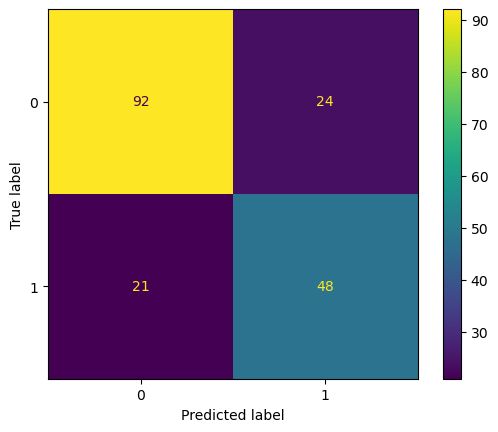

In [70]:
yp = ann_model.predict(X_test_scaled)

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

#plot
cm = confusion_matrix(y_test, y_pred)

TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
accuracy = (TN + TP) / (TN + FP + TP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2* precision * recall / (precision + recall)
print(f"Accuracy Score: {accuracy * 100:.2f}%")
print(f"Precision Score: {Precision * 100:.2f}%")
print(f"Recall Score: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")

disp = ConfusionMatrixDisplay(cm)
disp.plot()
display(cm)

https://www.geeksforgeeks.org/hyperparameter-tuning-using-gridsearchcv-and-kerasclassifier/

https://adriangb.com/scikeras/stable/migration.html

f1 van 70% dat gaat de betere kant op. laten we proberen om met een GridSearch het te verbeteren:

In [71]:
ann_model3 = keras.Sequential([
    keras.layers.Dense(16, input_shape=(8,), activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

ann_model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics = ['AUC'])

ann_model3.fit(X_sm, y_sm, epochs=500)

Epoch 1/500
18/18 [==============================] - 1s 1ms/step - loss: 0.7970 - auc: 0.5352
Epoch 2/500
18/18 [==============================] - 0s 1ms/step - loss: 0.7770 - auc: 0.5338
Epoch 3/500
18/18 [==============================] - 0s 1ms/step - loss: 0.6913 - auc: 0.5881
Epoch 4/500
18/18 [==============================] - 0s 989us/step - loss: 0.7005 - auc: 0.6189
Epoch 5/500
18/18 [==============================] - 0s 1ms/step - loss: 0.7068 - auc: 0.5702
Epoch 6/500
18/18 [==============================] - 0s 1ms/step - loss: 0.7035 - auc: 0.5832
Epoch 7/500
18/18 [==============================] - 0s 1ms/step - loss: 0.6668 - auc: 0.6518
Epoch 8/500
18/18 [==============================] - 0s 940us/step - loss: 0.7076 - auc: 0.5863
Epoch 9/500
18/18 [==============================] - 0s 1ms/step - loss: 0.6571 - auc: 0.6629
Epoch 10/500
18/18 [==============================] - 0s 1ms/step - loss: 0.6489 - auc: 0.6721
Epoch 11/500
18/18 [==============================] - 0

18/18 [==============================] - 0s 994us/step - loss: 0.4994 - auc: 0.8271
Epoch 87/500
18/18 [==============================] - 0s 974us/step - loss: 0.4977 - auc: 0.8252
Epoch 88/500
18/18 [==============================] - 0s 942us/step - loss: 0.4985 - auc: 0.8375
Epoch 89/500
18/18 [==============================] - 0s 883us/step - loss: 0.5020 - auc: 0.8387
Epoch 90/500
18/18 [==============================] - 0s 955us/step - loss: 0.5017 - auc: 0.8375
Epoch 91/500
18/18 [==============================] - 0s 1ms/step - loss: 0.4837 - auc: 0.8393
Epoch 92/500
18/18 [==============================] - 0s 975us/step - loss: 0.4772 - auc: 0.8429
Epoch 93/500
18/18 [==============================] - 0s 933us/step - loss: 0.4945 - auc: 0.8270
Epoch 94/500
18/18 [==============================] - 0s 1ms/step - loss: 0.4957 - auc: 0.8417
Epoch 95/500
18/18 [==============================] - 0s 988us/step - loss: 0.4917 - auc: 0.8413
Epoch 96/500
18/18 [===========================

18/18 [==============================] - 0s 982us/step - loss: 0.4487 - auc: 0.8544
Epoch 171/500
18/18 [==============================] - 0s 964us/step - loss: 0.4469 - auc: 0.8595
Epoch 172/500
18/18 [==============================] - 0s 1ms/step - loss: 0.4215 - auc: 0.8700
Epoch 173/500
18/18 [==============================] - 0s 1000us/step - loss: 0.4451 - auc: 0.8707
Epoch 174/500
18/18 [==============================] - 0s 1ms/step - loss: 0.4551 - auc: 0.8607
Epoch 175/500
18/18 [==============================] - 0s 896us/step - loss: 0.4449 - auc: 0.8729
Epoch 176/500
18/18 [==============================] - 0s 959us/step - loss: 0.4253 - auc: 0.8861
Epoch 177/500
18/18 [==============================] - 0s 1ms/step - loss: 0.4495 - auc: 0.8652
Epoch 178/500
18/18 [==============================] - 0s 900us/step - loss: 0.4333 - auc: 0.8584
Epoch 179/500
18/18 [==============================] - 0s 948us/step - loss: 0.4473 - auc: 0.8613
Epoch 180/500
18/18 [==================

18/18 [==============================] - 0s 923us/step - loss: 0.3833 - auc: 0.8959
Epoch 255/500
18/18 [==============================] - 0s 1ms/step - loss: 0.3983 - auc: 0.8879
Epoch 256/500
18/18 [==============================] - 0s 972us/step - loss: 0.3823 - auc: 0.8925
Epoch 257/500
18/18 [==============================] - 0s 998us/step - loss: 0.3826 - auc: 0.8897
Epoch 258/500
18/18 [==============================] - 0s 1ms/step - loss: 0.3877 - auc: 0.8883
Epoch 259/500
18/18 [==============================] - 0s 988us/step - loss: 0.4078 - auc: 0.8755
Epoch 260/500
18/18 [==============================] - 0s 946us/step - loss: 0.3936 - auc: 0.8911
Epoch 261/500
18/18 [==============================] - 0s 911us/step - loss: 0.4052 - auc: 0.8808
Epoch 262/500
18/18 [==============================] - 0s 999us/step - loss: 0.3951 - auc: 0.8829
Epoch 263/500
18/18 [==============================] - 0s 945us/step - loss: 0.4139 - auc: 0.8724
Epoch 264/500
18/18 [=================

18/18 [==============================] - 0s 945us/step - loss: 0.3618 - auc: 0.9093
Epoch 339/500
18/18 [==============================] - 0s 991us/step - loss: 0.3806 - auc: 0.8918
Epoch 340/500
18/18 [==============================] - 0s 1ms/step - loss: 0.3852 - auc: 0.8898
Epoch 341/500
18/18 [==============================] - 0s 1ms/step - loss: 0.3807 - auc: 0.9038
Epoch 342/500
18/18 [==============================] - 0s 1ms/step - loss: 0.3646 - auc: 0.9021
Epoch 343/500
18/18 [==============================] - 0s 979us/step - loss: 0.3617 - auc: 0.8961
Epoch 344/500
18/18 [==============================] - 0s 944us/step - loss: 0.3812 - auc: 0.8926
Epoch 345/500
18/18 [==============================] - 0s 945us/step - loss: 0.3630 - auc: 0.9032
Epoch 346/500
18/18 [==============================] - 0s 1ms/step - loss: 0.3763 - auc: 0.9022
Epoch 347/500
18/18 [==============================] - 0s 978us/step - loss: 0.3649 - auc: 0.9051
Epoch 348/500
18/18 [=====================

18/18 [==============================] - 0s 922us/step - loss: 0.3461 - auc: 0.9168
Epoch 423/500
18/18 [==============================] - 0s 1ms/step - loss: 0.3726 - auc: 0.8941
Epoch 424/500
18/18 [==============================] - 0s 1ms/step - loss: 0.3425 - auc: 0.9147
Epoch 425/500
18/18 [==============================] - 0s 1ms/step - loss: 0.3583 - auc: 0.9056
Epoch 426/500
18/18 [==============================] - 0s 939us/step - loss: 0.3689 - auc: 0.9030
Epoch 427/500
18/18 [==============================] - 0s 944us/step - loss: 0.3590 - auc: 0.9089
Epoch 428/500
18/18 [==============================] - 0s 974us/step - loss: 0.3350 - auc: 0.9246
Epoch 429/500
18/18 [==============================] - 0s 875us/step - loss: 0.3591 - auc: 0.9118
Epoch 430/500
18/18 [==============================] - 0s 976us/step - loss: 0.3494 - auc: 0.9152
Epoch 431/500
18/18 [==============================] - 0s 912us/step - loss: 0.3907 - auc: 0.8887
Epoch 432/500
18/18 [===================

6/6 [==============================] - 0s 818us/step
Accuracy Score: 74.59%
Precision Score: 74.14%
Recall Score: 76.81%
F1-score: 69.28%


array([[85, 31],
       [16, 53]], dtype=int64)

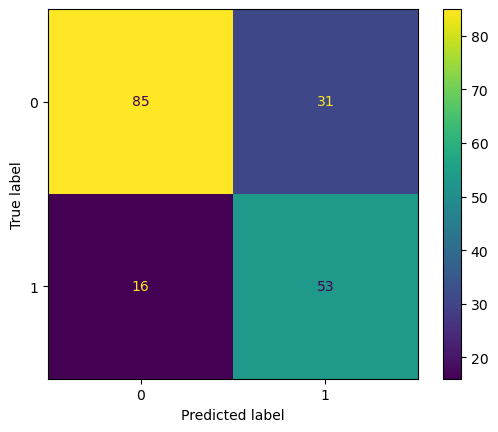

In [72]:
yp = ann_model3.predict(X_test_scaled)

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

#plot
cm = confusion_matrix(y_test, y_pred)

TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
accuracy = (TN + TP) / (TN + FP + TP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2* precision * recall / (precision + recall)
print(f"Accuracy Score: {accuracy * 100:.2f}%")
print(f"Precision Score: {Precision * 100:.2f}%")
print(f"Recall Score: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")

disp = ConfusionMatrixDisplay(cm)
disp.plot()
display(cm)

## Ensemble

<b>Definitie EDA</b>
De theorie van Ensemble learning is dat het een procedure is die gebruikt maakt van meerdere  leermachines, door deze leermachines als een comité van besluitvormers te behandelen en hun individuele output te combineren. Het idee erachter is dat de beslissing van het comité als geheel, waarbij individuele voorspellingen worden gecombineerd, gemiddeld een hogere mate van nauwkeurigheid zou moeten hebben dan comitéleden afzonderlijk (Brown, G.).
In de context van machine learning houdt een “Ensemble” in dat er verschillende machine learning-modellen worden gecombineerd tot één voorspellend model. De gecombineerde kracht van de modellen compenseert individuele variances en biases van de modellen. Door een samengestelde voorspelling is  de nauwkeurigheid van de voorspelling beter dan bij de individuele modellen afzonderlijk. 

<b>Hard voting vs soft voting</b>
Bij Ensemble learning moet er de keuze worden gemaakt uit twee soorten van stemmingen: hard voting en soft voting.  Hard voting betekent dat je de de stemmen die de onderhavige modellen hebben gegeven bij elkaar optelt en zo de kant laat winnen dat de meeste stemmen krijgt. Soft voting houdt in dat de voorspelde kansen voor de klassenlabels (in ons geval is dat alleen de kans dat het “1” is) bij elkaar optelt en zo het klasselabel van de grootste kans voorspelt. Wij hebben in principe voor soft voting gekozen, omdat we zo beter de nuance van de scores van de modellen kunnen meenemen. Echter zien wij de keuze voor hard of soft voting ook als een hyperparameter, dus wij zullen minimaal 1 keer ook hard voting uitproberen.


Stel dat de stemming onder modellen  A, B, C, D en E als volgt is:
A: stemt 0
B: stemt 1
C: stemt 1
D: stemt 1
E: stemt 0.
Hierbij heeft “1” meer stemmen gekregen, dus zal het model als geheel voor “1” kiezen.
In het geval van soft voting telt men de percentages bij elkaar op en wordt die optelling gedeeld door het aantal deelnemende modellen om uit te komen bij een gemiddelde kansverdeling.
Stel dat de stemming onder modellen A, B, C, D en E als volgt is:
A: geeft een kans van 0.75
B: geeft een kans van 0.54
C: geeft een kans van 0.64
D: geeft een kans van 0.33
E: geeft een kans van 0.91
Daar komt een gemiddelde accuracy uit van 0.634. Aangezien dat meer dan de helft is, zal het ensemble kiezen voor “1”. 


Bij een Ensemble zijn er vele hyperparameters die kunnen worden aangepast om potentieel een beter resultaat te behalen, omdat het model immers uit vele andere modellen bestaat. Dus die behandel ik hier per model afzonderlijk. Een opmerking moet hierbij worden gemaakt dat de uitkomsten van het Ensemble erg wisselend zijn, omdat het gebruik maakt van voting over de prestaties van verschillende modellen die ook steeds net iets anders doen, zodat de resultaten wat onvoorspelbaarder zijn. We merkten bij de basiscode, waarvan de hyperparameters nog niet waren getuned, dat er steeds andere resultaten uitkwamen. Om de code reproduceerbaar te maken, hebben we daarom de randoms van de modellen op bepaalde waarden gesteld.

Uitleg voor keuze van modellen
Onze keuze voor het Ensemble is omwille van twee redenen gevallen op Logistic Regression, Random Forest, Ada Boost en Gradient Descent. Ten eerste hebben wij reeds gezien dat deze modellen op zichzelf al redelijk goede tot goede resultaten opleveren. Vooral Gradiënt resultaat leverde een hoge F1-score. Daarnaast vinden wij dit een diverse set aan modellen, waardoor wij denken dat ze elkaar kunnen complementeren en de robuustheid van het Ensemble wordt versterkt.

De code
Met betrekking tot de code hebben we gebruik gemaakt van het bekijken van YouTube filmpjes, het vragen aan  ChatGPT wat essentiele onderdelen zijn in de code voor een Ensemble dat bestaat uit Logistic Regression (ChatGPT. (2023, October 8). Bouw Ensemble ML Model), Random Forest, Ada Boost en Gradient Descent, informatie die we al hadden over het tunen van hyperparameters (Zie: de andere modellen).

In [73]:
from sklearn.ensemble import VotingClassifier 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 


In [74]:
# Definieer de modellen zonder hyperparameterspecifieke instellingen 
logistic_model = LogisticRegression(max_iter=1000, random_state=42) 
random_forest_model = RandomForestClassifier(random_state=42) 
ada_boost_model = AdaBoostClassifier(random_state=42) 
gradient_boost_model = GradientBoostingClassifier(random_state=42)

In [75]:
# Maak een ensemble van de modellen 
ensemble_model = VotingClassifier(estimators=[ 
    ('logistic', logistic_model), 
    ('random_forest', random_forest_model), 
    ('ada_boost', ada_boost_model), 
    ('gradient_boost', gradient_boost_model) 
], voting='soft') 

In [76]:
# Definieer hyperparameter grid voor GridSearchCV 
param_grid = { 
    'logisticC': [0.0625, 0.125, 0.1875, 0.25, 0.3125, 0.375, 0.4375, 0.5, 0.5625, 0.625, 0.6875, 0.75, 0.8125, 0.875, 0.9375, 1.0], 
    'random_forestn_estimators': [50, 100, 200], 
    'ada_boostn_estimators': [50, 100, 200], 
    'gradient_boostn_estimators': [50, 100, 200], 
}

In [77]:
# Voer GridSearchCV uit met cross-validation 
grid_search = GridSearchCV(ensemble_model, param_grid, cv=5, scoring='f1') 
grid_search.fit(X_train, y_train)

ValueError: Invalid parameter ada_boostn_estimators for estimator VotingClassifier(estimators=[('logistic',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('random_forest',
                              RandomForestClassifier(random_state=42)),
                             ('ada_boost', AdaBoostClassifier(random_state=42)),
                             ('gradient_boost',
                              GradientBoostingClassifier(random_state=42))],
                 voting='soft'). Check the list of available parameters with `estimator.get_params().keys()`.

In [78]:
# Haal het beste ensemble model op na GridSearchCV 
best_ensemble_model = grid_search.best_estimator_ 

# Print de beste hyperparameterwaarden na GridSearchCV 
print("Beste hyperparameterwaarden:")
print(grid_search.best_params_)

# Doe voorspellingen met het beste ensemble model 
y_pred = best_ensemble_model.predict(X_test) 

# Bereken de nauwkeurigheid van het ensemble model 
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy:", accuracy) 

# Bereken en druk de Precision Score, Recall en F1-score af 
precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred) 
f1 = f1_score(y_test, y_pred) 

print("Precision Score:", precision) 
print("Recall Score:", recall) 
print("F1-score:", f1)


AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

# kaggle

Wij gaan proberen om een zo hoog mogelijke f1 score neer te zetten.

In [79]:
mask = (test[['Glucose', 'Insulin', 'SkinThickness', 'BloodPressure', 'BMI']] == 0).any(axis=1)

df_with_zeros = test[mask]
df_without_zeros = test[~mask]

#we gaan eerst de id nummer opslaan voordat we ze verwijderen
id_with_zeros = df_with_zeros['p_id']
id_without_zeros = df_without_zeros['p_id']

df_with_zeros = df_with_zeros.drop(['p_id'], axis=1)
df_without_zeros = df_without_zeros.drop(['p_id'], axis=1)

display(df_with_zeros)
display(df_without_zeros)

#antwoorden maken zodat we ons modellen kunnen testen

#yes zijn de kaggle antwoorden
yes = [0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,
 0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,
 1,1,0,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,1,0,1,
 0]

diabetes = pd.read_csv('diabetes.csv') 
test_id = test['p_id']

antwoorden = test.copy()
antwoorden['Outcome'] = yes


ant_with_zeros = antwoorden[mask]['Outcome']
ant_without_zeros = antwoorden[~mask]['Outcome']

print(ant_with_zeros)
print(ant_without_zeros)

print(id_with_zeros)
print(id_without_zeros)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              1       85             66             29        0  26.6   
5              8       99             84              0        0  35.4   
8             10      122             78             31        0  27.6   
11             2       71             70             27        0  28.0   
13             0      146             82              0        0  40.5   
..           ...      ...            ...            ...      ...   ...   
144            4      118             70              0        0  44.5   
147           10       94             72             18        0  23.1   
150            4      136             70              0        0  31.2   
151            7      137             90             41        0  32.0   
152            9      170             74             31        0  44.0   

     DiabetesPedigreeFunction  Age  
0                       0.351   31  
5                       0.388   50  
8                       0.512   45  
11                      0.586   22  
13                      1.781   44  
..                        ...  ...  
144                     0.904   26  
147                     0.595   56  
150                     1.182   22  
151                     0.391   39  
152                     0.403   43  

[74 rows x 8 columns]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1              0      137             40             35      168  43.1   
2              1      189             60             23      846  30.1   
3              5      166             72             19      175  25.8   
4              3      126             88             41      235  39.3   
6              1       97             66             15      140  23.2   
..           ...      ...            ...            ...      ...   ...   
145            2      122             76             27      200  35.9   
146            3      158             64             13      387  31.2   
148            1      149             68             29      127  29.3   
149            1       81             74             41       57  46.3   
153            5      121             72             23      112  26.2   

     DiabetesPedigreeFunction  Age  
1                       2.288   33  
2                       0.398   59  
3                       0.587   51  
4                       0.704   27  
6                       0.487   22  
..                        ...  ...  
145                     0.483   26  
146                     0.295   24  
148                     0.349   42  
149                     1.096   32  
153                     0.245   30  

[80 rows x 8 columns]

FileNotFoundError: [Errno 2] No such file or directory: 'diabetes.csv'

We hebben in eerste instantie de rijen die we moeten voorspellen verdeeld over twee dataframes. Onze strategie is om twee modellen te trainen, één met nulwaarden en één zonder, en deze later samen te voegen.

In [80]:
# test het model
y_pred = rfm_gs2.best_estimator_.predict(df_with_zeros)

#plot
cm = confusion_matrix(ant_with_zeros, y_pred)

TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
accuracy = (TN + TP) / (TN + FP + TP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2* precision * recall / (precision + recall)
print(f"Accuracy Score: {accuracy * 100:.2f}%")
print(f"Precision Score: {Precision * 100:.2f}%")
print(f"Recall Score: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")

disp = ConfusionMatrixDisplay(cm)
disp.plot()
display(cm)

NameError: name 'ant_with_zeros' is not defined

Om te testen hebben wij ons random forest-model gebruikt. Dit model heeft op de testset met 0 waarde een F1-score van 0% behaald. Dit betekent dat ons model hier nutteloos is en dat we een tweede model moeten gaan trainen om voor deze testset een goede resultaat te behalen.

In [81]:
# test het model
y_pred = rfm_gs2.best_estimator_.predict(df_without_zeros)

#plot
cm = confusion_matrix(ant_without_zeros, y_pred)

TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
accuracy = (TN + TP) / (TN + FP + TP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2* precision * recall / (precision + recall)
print(f"Accuracy Score: {accuracy * 100:.2f}%")
print(f"Precision Score: {Precision * 100:.2f}%")
print(f"Recall Score: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")

disp = ConfusionMatrixDisplay(cm)
disp.plot()
display(cm)

NameError: name 'ant_without_zeros' is not defined

Op de testset zonder missende waarden scoort hetzelfde model 70.37%. Dit wijst erop dat het model goede resultaten behaalt wanneer er geen ontbrekende waarden zijn.


In [82]:
# test het model
y_pred = best_gboost.predict(df_without_zeros)

#plot
cm = confusion_matrix(ant_without_zeros, y_pred)

TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
accuracy = (TN + TP) / (TN + FP + TP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2* precision * recall / (precision + recall)
print(f"Accuracy Score: {accuracy * 100:.2f}%")
print(f"Precision Score: {Precision * 100:.2f}%")
print(f"Recall Score: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")

disp = ConfusionMatrixDisplay(cm)
disp.plot()
display(cm)

NameError: name 'ant_without_zeros' is not defined

Een andere optie die we hebben uitgeprobeerd, is Gradient Boosting, met een prachtig F1-resultaat van 74%.

In [83]:
df_wz_s = scale(df_without_zeros)


# test het model
yp = ann_model3.predict(df_wz_s)

y_pred_f = []
for element in yp:
    if element > 0.5:
        y_pred_f.append(1)
    else:
        y_pred_f.append(0)

#plot
cm = confusion_matrix(ant_without_zeros, y_pred_f)

TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
accuracy = (TN + TP) / (TN + FP + TP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2* precision * recall / (precision + recall)
print(f"Accuracy Score: {accuracy * 100:.2f}%")
print(f"Precision Score: {Precision * 100:.2f}%")
print(f"Recall Score: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")

disp = ConfusionMatrixDisplay(cm)
disp.plot()
display(cm)

3/3 [==============================] - 0s 1ms/step


NameError: name 'ant_without_zeros' is not defined

met AAN hebben we het hoogste gehaald met 74%

In [84]:
predict_without_zeros= pd.DataFrame({'id': id_without_zeros, 'y_pred': y_pred_f})
predict_without_zeros

id  y_pred
1      4       1
2     13       1
3     14       0
4     20       1
6     27       0
..   ...     ...
145  700       1
146  710       1
148  722       1
149  747       0
153  765       0

[80 rows x 2 columns]

### 0 waarden

we gaan nu proberen de dataset met 0 waardes goed te voorspellen

In [85]:
train2 = pd.read_csv('train_c.csv') 
train2_y = train2['Outcome']
train2

p_id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0     668            6       98             58             33      190  34.0   
1     324            2      112             75             32        0  35.7   
2     624            2      108             64              0        0  30.8   
3     690            8      107             80              0        0  24.6   
4     473            7      136             90              0        0  29.9   
..    ...          ...      ...            ...            ...      ...   ...   
609   384            1      125             70             24      110  24.3   
610   224            1      100             66             15       56  23.6   
611   729            2       92             52              0        0  30.1   
612   630            7      114             64              0        0  27.4   
613   472            0      119             66             27        0  38.8   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.430   43        0  
1                       0.148   21        0  
2                       0.158   21        0  
3                       0.856   34        0  
4                       0.210   50        0  
..                        ...  ...      ...  
609                     0.221   25        0  
610                     0.666   26        0  
611                     0.141   22        0  
612                     0.732   34        1  
613                     0.259   22        0  

[614 rows x 10 columns]

In [86]:
print(len(df_with_zeros))
pd.DataFrame((df_with_zeros[["Pregnancies",'Glucose',"DiabetesPedigreeFunction" ,'BloodPressure', "Age",'SkinThickness', 'Insulin', 'BMI']] == 0).sum(),columns = ["Aantal missende/nul waarden "])

74


Aantal missende/nul waarden 
Pregnancies                                         11
Glucose                                              1
DiabetesPedigreeFunction                             0
BloodPressure                                        4
Age                                                  0
SkinThickness                                       43
Insulin                                             74
BMI                                                  0

Onze dataset bevat 74 rijen met nul waarden. In de tabel is te zien dat er 74 ontbrekende waardes zijn voor Insulin. Aangezien alle gegevens voor Insulin ontbreken, kunnen we deze net zo goed verwijderen. SkinThickness heeft ook een hoop 0 waarden dus die gaan we voor nu ook verwijderen. mochten onze resultaten slecht zijn dan kunnen we er nog iets mee proberen te doen.

In [87]:
df_with_zeros = df_with_zeros.drop(['Insulin','SkinThickness'], axis=1)
train2 = train2.drop(['p_id', 'Insulin', 'Outcome','SkinThickness'], axis=1)

In [88]:
pd.DataFrame((df_with_zeros[["Pregnancies",'Glucose',"DiabetesPedigreeFunction" ,'BloodPressure', "Age", 'BMI']] == 0).sum(),columns = ["Aantal missende/nul waarden "])

Aantal missende/nul waarden 
Pregnancies                                         11
Glucose                                              1
DiabetesPedigreeFunction                             0
BloodPressure                                        4
Age                                                  0
BMI                                                  0

bij de overige 0 waarden gaan wij de mediaan in vullen

In [89]:
for col in ['Glucose',"DiabetesPedigreeFunction" ,'BloodPressure', "Age", 'BMI']:
    train2[col] = train2[col].replace(0, np.nan)

for col in ['Glucose',"DiabetesPedigreeFunction" ,'BloodPressure', "Age", 'BMI']:
    df_with_zeros[col] = df_with_zeros[col].replace(0, np.nan)

In [90]:
m_Glucose = train2['Glucose'].median() 
m_DiabetesPedigreeFunction = train2['DiabetesPedigreeFunction'].median() 
m_BloodPressure = train2['BloodPressure'].median() 
m_Age = train2['Age'].median() 
m_BMI = train2['BMI'].median() 

cols = ['Glucose',"DiabetesPedigreeFunction" ,'BloodPressure', "Age", 'BMI']
m = [m_Glucose, m_DiabetesPedigreeFunction, m_BloodPressure, m_Age, m_BMI]
for i in range(5):
    print(cols[i],m[i])
    
for i in range(5):
    train2[cols[i]] = train2[cols[i]].replace(np.nan, m[i])
for i in range(5):
    df_with_zeros[cols[i]] = df_with_zeros[cols[i]].replace(np.nan, m[i])
df_with_zeros

Glucose 116.0
DiabetesPedigreeFunction 0.3655
BloodPressure 72.0
Age 29.0
BMI 32.4


Pregnancies  Glucose  BloodPressure   BMI  DiabetesPedigreeFunction  Age
0              1     85.0           66.0  26.6                     0.351   31
5              8     99.0           84.0  35.4                     0.388   50
8             10    122.0           78.0  27.6                     0.512   45
11             2     71.0           70.0  28.0                     0.586   22
13             0    146.0           82.0  40.5                     1.781   44
..           ...      ...            ...   ...                       ...  ...
144            4    118.0           70.0  44.5                     0.904   26
147           10     94.0           72.0  23.1                     0.595   56
150            4    136.0           70.0  31.2                     1.182   22
151            7    137.0           90.0  32.0                     0.391   39
152            9    170.0           74.0  44.0                     0.403   43

[74 rows x 6 columns]

We gaan nu een paar modellen proberen om te kijken welke we het beste kunnen gebruiken voor deze nieuwe dataset. Eerst gaan wij GradientBoosting testen omdat die ook erg sterk was bij de dataset zonder 0 waardes

In [91]:
svm_model2 = SVC(random_state=44)
svm_model2.fit(train2, train2_y)

param = {
    'C': [0.5, 1, 10, 100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

svc_gs2 = GridSearchCV(estimator = svm_model2,
                 param_grid = param,
                 cv = 5,
                 refit = "f1",
                 verbose = 1)

svc_gs2.fit(train2, train2_y)
print("best params:",svc_gs2.best_params_)
print("f1-score:",svc_gs2.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
best params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
f1-score: 0.7687724910035985


In [92]:
# test het model
y_pred = svc_gs2.best_estimator_.predict(df_with_zeros)

#plot
cm = confusion_matrix(ant_with_zeros, y_pred)

TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
accuracy = (TN + TP) / (TN + FP + TP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2* precision * recall / (precision + recall)
print(f"Accuracy Score: {accuracy * 100:.2f}%")
print(f"Precision Score: {Precision * 100:.2f}%")
print(f"Recall Score: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")

disp = ConfusionMatrixDisplay(cm)
disp.plot()
display(cm)

NameError: name 'ant_with_zeros' is not defined

47.06% moet beter kunnen

nu ANN

In [ ]:
train_scaled2 = scale(train2)
test_scaled2 = scale(df_with_zeros)

In [ ]:
train2_y.value_counts()

In [ ]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(train_scaled2, train2_y)

y_sm.value_counts()

In [ ]:
ann_model4 = keras.Sequential([
    keras.layers.Dense(16, input_shape=(6,), activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

ann_model4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics = ['AUC'])

ann_model4.fit(X_sm, y_sm, epochs=650)

In [ ]:
yp = ann_model4.predict(test_scaled2)

y_pred_f_z = []
for element in yp:
    if element > 0.5:
        y_pred_f_z.append(1)
    else:
        y_pred_f_z.append(0)

#plot
cm = confusion_matrix(ant_with_zeros, y_pred_f_z)

TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
accuracy = (TN + TP) / (TN + FP + TP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2* precision * recall / (precision + recall)
print(f"Accuracy Score: {accuracy * 100:.2f}%")
print(f"Precision Score: {Precision * 100:.2f}%")
print(f"Recall Score: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")

disp = ConfusionMatrixDisplay(cm)
disp.plot()
display(cm)

f1 van 67%

In [ ]:
predict_with_zeros= pd.DataFrame({'id': id_with_zeros, 'y_pred': y_pred_f_z})


### we gaan nu ons twee voorspelingen samenvoegen 

In [93]:
display(predict_with_zeros)
display(predict_without_zeros)

NameError: name 'predict_with_zeros' is not defined

In [94]:
final_answer = pd.concat([predict_with_zeros, predict_without_zeros])
final_answer = final_answer.sort_values(by=['id'])
final_answer

NameError: name 'predict_with_zeros' is not defined

In [95]:
cm = confusion_matrix(yes, final_answer['y_pred'])

TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
accuracy = (TN + TP) / (TN + FP + TP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2* precision * recall / (precision + recall)
print(f"Accuracy Score: {accuracy * 100:.2f}%")
print(f"Precision Score: {Precision * 100:.2f}%")
print(f"Recall Score: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")

disp = ConfusionMatrixDisplay(cm)
disp.plot()
display(cm)

NameError: name 'final_answer' is not defined

eind resultaat voor kaggle is 70.97%

### Bevindingen

##### F1-Scores(Afgerond) modellen

Dit zijn onze F1-scores afgerond op hele getallen

| Model              | F1-score |
|--------------------|----------|
| Logistic Regression| 65       |
| Decision Tree      | 68       |
| Random Forest      | 76       |
| Gradient Boosting  | 69       |
| ADA Boosting       | 67       |
| SVM                | 68       |
| ANN                | 73       |

Hieruit kunnen we zien dat Random Forest voor ons het beste resultaat geeft van al onze modellen, Dit heeft hij bereikt met de params:

best_params:{'bootstrap': False, 'ccp_alpha': 0.008, 'criterion': 'entropy', 'n_estimators': 600}

### Kaggle
In de eerste twee weken waren we de eersten die resultaten op Kaggle plaatsten. Dit deden we omdat we graag bovenaan wilden staan, zelfs al waren we het enige team op het leaderboard op dat moment. In de openingsweek hebben we verschillende modellen uitgeprobeerd, maar het meeste succes behaalden we met Logistic Regression, waarbij we volgens Kaggle een score van 75% behaalden, hoewel we in werkelijkheid denken dat het niet veel hoger kon zijn dan 60%. 

 

In de week voor de deadline hebben we serieuze inspanningen geleverd. Wij gebruikten een Random Forest-model met een totale F1-score van ongeveer 50%. Dit was te wijten aan dat het model niet werkte op personen  waarvan  er missende waardes waren. Mochten er geen missende waarden aanwezig zijn, dan zouden we een F1-score van 75% behalen. voor gevallen waarin er ontbrekende waarden waren, behaalden we een F1-score van 0% . Om deze reden zijn we overgestapt op een ANN-model, dat bijna 73% F1-score behaalde. 


### Conclusie en aanbevelingen


##### Bepaal welke features het meeste invloed hebben op je voorspellingen

Bij de modellen waarbij dat toepasbaar is hebben we feature.importances_ gebruikt, zodat we erachter konden komen wat de features waren die de meeste invloed hadden op onze voorspellingen. Dit hebben we kunnen uitvoeren bij de modellen: Decision Tree, Random Forest, Gradient Boosting en ADA Boosting hierbij zijn we op het volgende gekomen.

* Decision Tree: Waren Glucose en BMI de belangrijkste features op de voorspellingen
* Random Forest: Waren Glucose, Insuline en BMI de belangrijkste features op de voorspellingen
* Gradient Boosting: Waren Insuline, Glucose en BMI de belangrijkste features op de voorspellingen
* ADA Boosting: Waren ook Insuline, Glucose en BMI de belangrijkste features op de voorspellingen

##### Beschrijf in hoeverre dit aansluit op de EDA.
Bij onze modellen zien we dat Glucose en BMI bij alle modellen aanwezig zijn als de belangrijkste features. De feature die we als belangrijkste hebben aangemerkt bij onze EDA was Glucose, omdat we zagen dat Glucose een redelijk hoge correlatie had met de "Outcome"-kolom. Dus het kwam niet als een verrassing dat dit één van de belangrijkste features zou worden bij onze modellen.  Echter hadden we niet verwacht dat bij de modellen Gradient Boosting en ADA Boosting Insuline de meeste invloed zou hebben op het model. Dit komt, omdat als we naar de correlatie-matrix kijken er maar een kleine 0.12 correlatie met de Outcome-kolom is. 

Ookal zegt dit natuurlijk niet alles, omdat Feature importances kijkt naar hoe belangrijk de feature was voor het maken van de voorspellingen dus niet direct hoe de feature staat ten opzichte van onze "Outcome" kolom vinden wij het alsnog wel een interessante bevinding. Wat wel terug te lezen is bij onze correlaties zien we dat alle 3 bovenstaande features (dus: Insuline, Glucose en BMI) hoge correlaties hadden met één kolom in de dataset. Hierbij vinden we het dus ook opvallend dat SkinThickness, die een hoge correlatie had met zowel BMI als Insuline, helemaal niet hoog staat in de rankings van feature importances terwijl SkinThickness wel hoge correlaties had met 2 van de kolommen (BMI, Insuline) die wat de features betreft een grote invloed hadden. 

Hieruit kunnen we dus concluderen dat de invloed van de features (Feature Importances) wel redelijk goed aansluit op de EDA 

##### Welk advies kun je op basis hiervan geven aan een arts?
Gebaseerd op deze bevindingen zou het advies aan een arts kunnen zijn om bij het evalueren van patiënten met betrekking tot het diabetesrisico speciale aandacht te besteden aan de meting van Glucose en BMI, aangezien deze kenmerken consistent als belangrijk worden beschouwd in verschillende modellen. Insuline kan ook in overweging worden genomen, ondanks de lage correlatie, omdat het nog steeds van invloed kan zijn in sommige modellen

##### Welk model zou je adviseren aan een arts? 
Wij zouden de Random Forest model aanbevelen wanneer  de arts alle benodigde data heeft van de patient. Random Forest is betrouwbaar en is makkelijk traceerbaar dus de arts kan nagaan waarom het model tot een bepaalde voorspelling is gekomen. In het geval dat de arts niet alle data ter beschikking heeft is ANN een goede back-up-optie. ANN is een nauwkerig en robuust model. Echter het nadeel van ANN is dat bijna niet te traceren valt hoe het model op diens antwoord is gekomen. ANN is nauwkeurig maar maak ook fouten en daarom is het een goed idee voor een arts om meerdere machine learning-modellen te gebruiken als een dubbele check. Als laatste raden wij aan dat de arts zijn eigen oordeel het beste als beslissend  kan beschouwen, als een laatste check.  





# Bronnen

Coding Lane. (2021, January 15). Logistic Regression Gradient Descent | Derivation | Machine Learning [Video]. YouTube. https://www.youtube.com/watch?v=t6MVuMavbBY

Brown, G. (2010). Ensemble Learning. In Encyclopedia of Machine Learning (pp. 312–320). Springer. ISBN 978-0-387-30768-8. Retrieved from https://link.springer.com/referenceworkentry/10.1007/978-0-387-30164-8_252

Brownlee, J. (2021, April 27). How to Develop Voting Ensembles With Python. Machine Learning Mastery. https://machinelearningmastery.com/voting-ensembles-with-python/

Simplilearn. (2019). Ensemble Learning | Ensemble Learning In Machine Learning | Machine Learning Tutorial | Simplilearn [Video]. YouTube. URL: https://www.youtube.com/watch?v=WtWxOhhZWX0

ChatGPT. (2023, October 8). Bouw Ensemble ML Model. Retrieved from https://chat.openai.com/c/d821399a-ac46-45a5-8ebd-f4c07ff5cb15

StatQuest with Josh Starmer. (2018, September 24). Regularization Part 1: Ridge (L2) Regression [Video]. YouTube. https://www.youtube.com/watch?v=Q81RR3yKn30&ab_channel=StatQuestwithJoshStarmer

StatQuest with Josh Starmer. (2018, October 1). Regularization Part 2: Lasso (L1) Regression [Video]. YouTube. https://www.youtube.com/watch?v=NGf0voTMlcs&ab_channel=StatQuestwithJoshStarmer

StatQuest with Josh Starmer. (2018, February 5). StatQuest: Random Forests Part 1 - Building, Using and Evaluating [Video]. YouTube. https://www.youtube.com/watch?v=J4Wdy0Wc_xQ&ab_channel=StatQuestwithJoshStarmer

Learn with Whiteboard. (2021, June 7). ANN vs CNN vs RNN | Difference Between ANN CNN and RNN | Types of Neural Networks Explained [Video]. YouTube. https://www.youtube.com/watch?v=JnlM4yLFNuo

codebasics. (2020, September 7). Customer churn prediction using ANN | Deep Learning Tutorial 18 (Tensorflow2.0, Keras & Python) [Video]. YouTube. https://www.youtube.com/watch?v=MSBY28IJ47U&ab_channel=codebasics

codebasics. (2020, September 24). Handling imbalanced dataset in machine learning | Deep Learning Tutorial 21 (Tensorflow2.0 & Python) [Video]. YouTube. https://www.youtube.com/watch?v=JnlM4yLFNuo&ab_channel=codebasics

*ChatGPT is gebruikt als hulpmiddel bij spelling en grammatica van vele stukken

StatQuest with Josh Starmer. (2019, September 30). Support Vector Machines Part 1 (of 3): Main Ideas!!! [Video]. YouTube. https://www.youtube.com/watch?v=efR1C6CvhmE

Visually Explained. (2022, May 9). The Kernel Trick in Support Vector Machine (SVM) [Video]. YouTube. https://www.youtube.com/watch?v=Q7vT0--5VII

StatQuest with Josh Starmer. (2019, January 14). AdaBoost, Clearly Explained [Video]. YouTube. https://www.youtube.com/watch?v=LsK-xG1cLYA

StatQuest with Josh Starmer. (2019, March 25). Gradient Boost Part 1 (of 4): Regression Main Ideas [Video]. YouTube. https://www.youtube.com/watch?v=3CC4N4z3GJc

Suresh, A. (2021, 16 december). What is a confusion matrix? - Analytics Vidhya - medium. Medium. https://medium.com/analytics-vidhya/what-is-a-confusion-matrix-d1c0f8feda5#:~:text=A%20Confusion%20matrix%20is%20an,by%20the%20machine%20learning%20model.
